<h1 style="text-align: center; font-size: 40px; color: gray; font-weight: 700; margin-bottom: 5px;">
    ALPHA TEAM JCDSOL 023
</h1>
<h2 style="text-align: center; font-weight: 500; margin-top: 0;">
    Use Case : Bank Telemarketing Campaign
</h2>
<h3 style="text-align: center; font-weight: 500; margin-top: 0;">
    <b>Dian Maya Safitri</b>, <b>Ghofar Ismail</b>, dan <b>Miranda Puspitasari</b>
</h3>
<hr style="border: 1px solid #ccc; width: 80%;">

# **Outline**

- [**Section 0.** Import Library](#import-library)
- [**Section 1.** Business Understanding](#business-understanding)
- [**Section 2.** Data Understanding](#data-understanding)
- [**Section 3.** Data Cleaning](#data-cleaning)
- [**Section 4.** Feature Generation](#feature-generation)
- [**Section 5.** Data Anlysis](#data-analysis)
- [**Section 6.** Modeling](#Modeling)
- [**Section 7.** Kesimpulan dan Rekomendasi](#kesimpulan-dan-rekomendasi)


# **IMPORT LIBRARY**



In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.class_weight import compute_class_weight

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, accuracy_score

# Deployment
import pickle
import os
from dataclasses import dataclass
from typing import Dict, Optional, List, Union

import warnings
warnings.filterwarnings('ignore')

# **BUSINESS UNDERSTANDING**

## **1. BACKGROUND**

Model bisnis pemasaran deposito berjangka di Portugal sangat mengandalkan telemarketing sebagai kanal utama untuk menjangkau calon nasabah. Aktivitas ini membutuhkan sumber daya operasional yang besar mulai dari waktu agen, biaya telekomunikasi, hingga proses administratif dalam melakukan follow-up. Keberhasilan kampanye sangat ditentukan oleh kemampuan untuk memahami karakteristik nasabah yang cenderung merespons positif terhadap penawaran deposito.

Selain aspek operasional, kondisi ekonomi Portugal saat kampanye 2013–2014 turut memengaruhi perilaku nasabah terhadap produk deposito. Menurut Press Release Banco de Portugal, total simpanan sektor non-moneter mencapai €225,6 miliar, dan lebih dari 70% simpanan masyarakat berada dalam bentuk deposito berjangka atau tabungan. Dengan tingkat ketidakpastian ekonomi pascakrisis 2008–2010, bank-bank sangat bergantung pada deposito sebagai sumber pendanaan stabil. Karena itu, mereka menjalankan kampanye telemarketing intensif, seperti produk ``Depósito a Prazo 12 Meses – Taxa Bónus Campanha Primavera 2014`` yang memiliki fitur:

*	Bunga promo 3% untuk 12 bulan pertama (lebih tinggi dari rata-rata bunga deposito pada umumnya 1,3–2%) (https://www.theglobaleconomy.com/Portugal/deposit_interest_rate/#:~:text=The%20most%20recent%20value%20is,1%202%203%204%205)
*	Minimum setoran €5.000, maksimum sekitar €60.000 (dengan bunga deposito spesial selama 3 tahun).
*	Dijamin penuh oleh Fundo de Garantia de Depósitos?Lembaga Penjamin Simpanan Portugal (tanpa risiko).
*	Tanpa penalti bila tarik dana lebih awal.
*	Bonus ekstra untuk nasabah baru (voucher, bebas biaya admin).

Namun, meskipun produk menarik, tingkat konversi tetap rendah, dan terjadi ketidakseimbangan besar antara jumlah nasabah yang dihubungi dan yang benar-benar membuka deposito. Data historis menunjukkan bahwa tingkat konversi kampanye telemarketing cenderung rendah. Dari lebih dari 40 ribu percobaan kontak, hanya sekitar 11% nasabah yang akhirnya menyetujui penempatan deposito. Angka ini mengindikasikan adanya ketidakefisienan dalam strategi targeting, sehingga banyak panggilan tidak menghasilkan nilai tambah. Situasi ini memperlihatkan perlunya pendekatan analitis untuk memahami lebih dalam pola respons nasabah.

Hal ini menunjukkan adanya masalah dalam strategi targeting, tingginya biaya per kontak (Cost per Acquisition/CPA), dan ketidakefisienan dalam pemanfaatan data. Dengan volume data besar dan hubungan antar variabel yang kompleks (demografi, riwayat kontak, kondisi makro, dan channel komunikasi), pendekatan analitik yang sistematis menjadi kebutuhan untuk meningkatkan efektivitas kampanye dan menurunkan pemborosan operasional.


## **2. PROBLEM STATEMENT**

Meskipun Bank Portugal menawarkan produk deposito dengan suku bunga kompetitif di tengah iklim ekonomi yang tidak pasti, realisasi konversi nasabah masih jauh dari target yang diharapkan. Strategi "spray and pray" dalam telemarketing—di mana agen menghubungi ribuan nasabah tanpa prioritas yang jelas—telah menyebabkan pembengkakan biaya operasional yang signifikan. Dengan rata-rata durasi panggilan yang memakan waktu (mean: ~258 detik) dan beberapa nasabah dihubungi berulang kali (hingga 56 kali dalam satu kampanye), sumber daya bank terkuras untuk melayani 88,7% nasabah yang pada akhirnya menolak penawaran. Ketidakefisienan ini bukan hanya membuang anggaran pemasaran, tetapi juga meningkatkan risiko brand fatigue di mata nasabah akibat kontak yang tidak relevan.

**Masalah Utama**

``Tingginya Cost per Acquisition (CPA) dan inefisiensi operasional telemarketing akibat ketidakmampuan bank dalam mengidentifikasi prospek berkualitas tinggi (High-Value Leads) sebelum panggilan dilakukan, yang mengakibatkan 89% upaya kontak menjadi beban biaya tanpa menghasilkan pendapatan (revenue).``

Untuk membedah masalah inefisiensi biaya dan targeting tersebut, masalah-masalah yang harus diselesaikan adalah :

1. **Analisis Cost vs. Duration:** Bagaimana hubungan antara durasi panggilan (duration) dengan keberhasilan konversi? Pada titik durasi berapakah sebuah panggilan mulai dianggap "membuang biaya" (diminishing return) jika tidak terjadi penutupan penjualan?
2. **Efektivitas Frekuensi Kontak:** Apakah meningkatkan jumlah panggilan (campaign) kepada nasabah yang sama benar-benar meningkatkan peluang konversi, atau justru hanya menambah biaya telekomunikasi dan operasional agen secara sia-sia?
3. **Profil Demografi Risiko Rendah:** Dari segi Job dan Education, segmen nasabah manakah (misal: retired vs blue-collar) yang memiliki conversion rate tertinggi sehingga layak diprioritaskan untuk mengurangi waktu prospeksi?
4. **Optimasi Waktu Kontak:** Pada bulan (month) dan hari apa (day_of_week) tingkat keberhasilan tertinggi tercatat? Apakah ada pola waktu tertentu di mana operasional telemarketing justru merugi?
5. Bagaimana kita dapat membangun model klasifikasi yang mampu memprediksi probabilitas seorang nasabah akan berlangganan deposito ("yes") berdasarkan fitur demografi dan riwayat kontaknya, sehingga tim marketing hanya perlu menghubungi 20-30% nasabah teratas namun tetap menangkap mayoritas potensi konversi?

## **3. GOALS**

Untuk mengatasi inefisiensi biaya yang kronis dan meningkatkan ROI kampanye, Bank Portugal perlu beralih dari pendekatan pemasaran massal ke pendekatan berbasis data presisi (precision marketing). Transformasi ini bertujuan untuk memastikan bahwa setiap sen biaya operasional dan setiap menit waktu agen dialokasikan hanya kepada nasabah yang memiliki probabilitas tertinggi untuk merespons positif, sehingga secara drastis menurunkan biaya akuisisi per nasabah baru.

**Tujuan Utama (Main Goal)** 

``Membangun model prediktif dan strategi targeting analitis yang dapat menurunkan Cost per Acquisition (CPA) melalui pengurangan panggilan yang tidak efektif, sekaligus meningkatkan Conversion Rate kampanye telemarketing deposito berjangka.``

Goals tersebut dapat dicapai dengan mencapai sub goals sebagai berikut :

1. **Identifikasi Profil Ideal Nasabah:** Memetakan karakteristik demografi (usia, pekerjaan, pendidikan) dan finansial nasabah yang paling profitable untuk dijadikan target prioritas (Ideal Customer Profile).
2. **Optimasi Alokasi Sumber Daya:** Merekomendasikan batasan jumlah panggilan (campaign threshold) dan durasi optimal untuk mencegah pemborosan waktu agen pada leads yang tidak responsif
3. **Strategi Waktu Kampanye:** Menentukan waktu terbaik (bulan/hari) dan kondisi ekonomi makro yang kondusif untuk meluncurkan kampanye agresif versus waktu untuk menahan kampanye (defensif).
4. **Pengembangan Model Prediksi (Machine Learning):** Menghasilkan model Machine Learning dengan performa metrik evaluasi (seperti Recall atau F1-Score) yang tinggi untuk mendeteksi calon nasabah potensial, sehingga dapat mengurangi daftar kontak (contact list) yang tidak perlu hingga 50-70% tanpa mengorbankan target penjualan.
5. **Peningkatan Retensi Melalui Data Historis:** Memanfaatkan data riwayat interaksi (pdays, previous) untuk merancang pendekatan khusus bagi nasabah lama (retargeting) dibandingkan nasabah baru (cold calling).

## **4. ANALYTICAL APPROACH**

Pendekatan analitik dimulai dengan proses **Exploratory Data Analysis (EDA)** sebagai fondasi utama untuk menjawab pertanyaan-pertanyaan pada problem statement yang berkaitan dengan pemahaman faktor-faktor yang memengaruhi keberhasilan kampanye. EDA digunakan untuk mengidentifikasi pola distribusi variabel, hubungan antar fitur, segmentasi nasabah berdasarkan karakteristik tertentu, serta efektivitas riwayat kontak dan channel komunikasi terhadap outcome kampanye. Melalui EDA, masalah inti seperti rendahnya tingkat konversi, pengaruh faktor demografis, dampak indikator makro, dan efektivitas durasi atau frekuensi kontak dapat dipetakan secara jelas dengan bukti kuantitatif.

Temuan dari EDA kemudian menjadi dasar bagi proses analisis lanjutan, termasuk data preprocessing, pengelolaan variabel kategorikal, penanganan imbalance, dan pembentukan fitur turunan untuk memperkaya kualitas analisis. Langkah ini bukan hanya mendukung kualitas EDA, tetapi juga mempersiapkan struktur data agar dapat digunakan pada tahap prediktif.

Ketika analisis deskriptif tidak lagi cukup untuk menjawab kebutuhan prioritisasi leads secara operasional, pendekatan **Machine Learning** digunakan sebagai solusi prediktif. Model klasifikasi dikembangkan untuk mengevaluasi probabilitas konversi nasabah berdasarkan pola historis yang telah diidentifikasi pada tahap EDA. Melalui model ini, organisasi dapat melakukan scoring dan prioritisasi leads secara lebih presisi, sehingga kampanye dapat diarahkan pada nasabah dengan potensi tertinggi untuk membuka deposito. Dengan demikian, keseluruhan proses analitik mengombinasikan pemahaman berbasis data melalui EDA dan kemampuan prediktif melalui ML sebagai dua pilar utama untuk meningkatkan efektivitas kampanye secara komprehensif.



## **5. EVALUATION METRICS**

Evaluation Metrics merupakan proses untuk menilai seberapa baik model prediksi bekerja dalam membedakan antara nasabah yang berpotensi menyetujui deposito dan yang tidak. Metrik digunakan sebagai acuan objektif untuk mengukur kualitas model sehingga keputusan bisnis dapat dibuat secara lebih terukur. Dalam konteks klasifikasi biner seperti kasus kampanye deposito berjangka, evaluasi performa model sangat bergantung pada struktur dasar yang disebut Confusion Matrix.

Confusion Matrix membagi hasil prediksi model menjadi empat komponen utama:  
- True Positive (TP) — model memprediksi "deposit" dan benar-benar "deposit".  
- True Negative (TN) — model memprediksi "tidak deposit" dan benar-benar "tidak deposit".  
- False Positive (FP) — model memprediksi "deposit" padahal sebenarnya "tidak deposit".  
- False Negative (FN) — model memprediksi "tidak deposit" padahal sebenarnya "deposit".

Masalah tersebsarnya berarti ada pada False Prediction (FP maupun FN). Jika di breakdown lebih dalam, maka :

**False Positive (FP)**  
Model memprediksi nasabah akan setuju, tetapi sebenarnya tidak tertarik.  
Dampak:  
- Biaya operasional meningkat karena agen menghubungi leads yang tidak produktif.  
- Waktu agen terbuang.  
- Cost per Acquisition meningkat.

**False Negative (FN)**  
Model memprediksi nasabah tidak akan setuju, tetapi sebenarnya berminat.  
Dampak:  
- Potensi pendapatan deposito hilang.  
- Penurunan tingkat konversi keseluruhan.  
- Leads bernilai tinggi tidak dihubungi.

Sebagai tim Data Scientist, kami memprioritaskan pengurangan **False Negative (FN)** untuk memastikan bahwa tidak ada calon nasabah potensial yang terlewat oleh sistem prediksi. False Negative terjadi ketika model memprediksi seorang nasabah tidak akan menaruh uang di deposito, padahal sebenarnya mereka berminat. Kesalahan ini berdampak langsung pada hilangnya peluang pendapatan dan menurunkan tingkat konversi kampanye.

Untuk itu, metrik utama yang menjadi fokus adalah **Recall**, yaitu kemampuan model dalam menangkap seluruh nasabah yang benar-benar berminat. Recall yang tinggi menunjukkan bahwa model berhasil meminimalkan FN, sehingga lebih banyak calon nasabah bernilai tinggi dapat dihubungi oleh agen telemarketing. Pendekatan ini memastikan bahwa kampanye berjalan lebih efektif, peluang penjualan meningkat, dan potensi pendapatan tidak terbuang.


$$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

# **DATA UNDERSTANDING**

## **1. DESKRIPSI DATASET**

-	[Sumber dataset: UCI Machine Learning Repository (Sergio Moro, Paulo Cortez, Paulo Rita).](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)
-	Jumlah Baris: 41.188 
-	Jumlah Kolom: 20 
-	Periode: 2014
-	Tipe Problem: Binary classification —> target y (yes/no) apakah convert ke term deposit.

Note :
- Sebagian besar fitur bersifat numerikal.
- Terdapat inkonsistensi penulisan pada fitur kategorikal.
- Setiap baris data merepresentasikan informasi seorang pelanggan yang deposit atau tidak.

| Nama Kolom | Tipe Data | Deskripsi |
| :--- | :--- | :--- |
| **`age`** | Numerik | Usia nasabah. |
| **`job`** | Kategorikal | Jenis pekerjaan nasabah (misal: admin, blue-collar, entrepreneur, dll). |
| **`marital`** | Kategorikal | Status pernikahan nasabah (married, single, divorced, unknown). |
| **`education`** | Kategorikal | Tingkat pendidikan nasabah. |
| **`default`** | Binary | Apakah nasabah memiliki kredit macet? (yes/no). |
| **`housing`** | Binary | Apakah nasabah memiliki cicilan rumah? (yes/no). |
| **`loan`** | Binary | Apakah nasabah memiliki pinjaman pribadi? (yes/no). |
| **`contact`** | Kategorikal | Jenis alat komunikasi yang digunakan (cellular/telephone). |
| **`month`** | Kategorikal | Bulan kontak terakhir dalam tahun (jan, feb, mar, ..., nov, dec). |
| **`day_of_week`** | Kategorikal | Hari kontak terakhir dalam seminggu (mon, tue, wed, thu, fri). |
| **`duration`** | Numerik | Durasi panggilan kontak terakhir dalam detik. |
| **`campaign`** | Numerik | Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah tersebut. |
| **`pdays`** | Numerik | Jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya (999 berarti belum pernah dihubungi). |
| **`previous`** | Numerik | Jumlah kontak yang dilakukan sebelum kampanye ini untuk nasabah tersebut. |
| **`poutcome`** | Kategorikal | Hasil dari kampanye pemasaran sebelumnya (failure, nonexistent, success). |
| **`emp.var.rate`** | Numerik | *Employment Variation Rate* - Indikator makroekonomi (variasi tingkat kerja kuartalan). |
| **`cons.price.idx`** | Numerik | *Consumer Price Index* - Indikator harga konsumen bulanan. |
| **`cons.conf.idx`** | Numerik | *Consumer Confidence Index* - Indikator kepercayaan konsumen bulanan. |
| **`euribor3m`** | Numerik | *Euribor 3 month rate* - Tingkat suku bunga harian. |
| **`nr.employed`** | Numerik | *Number of employees* - Indikator jumlah karyawan kuartalan. |
| **`y`** | Binary (Target) | Target variabel: apakah nasabah berlangganan deposito berjangka? (yes/no). |

## **2. DATASET PREVIEW**

In [3]:
# Load Dataset

df = pd.read_csv(
    r"C:\Users\PT Netzmi Kreasi\Desktop\Python\bank-additional-full.csv",
    sep=';'
)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Dataset General Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Catatan Singkat:**  
- Variabel `pdays` → 999 artinya nasabah belum pernah dihubungi sebelumnya. Untuk analisis yang lebih bermakna, nanti bisa dipetakan menjadi -1 (first contact). 
- Variabel `duration` menggambarkan berapa lama agen berbicara dengan nasabah. Ini sangat berkaitan langsung dengan output (nasabah tertarik = durasi panjang).
  Karena itu duration **tidak** boleh dimasukkan ke model (data leakage).   Tetapi tetap digunakan untuk insight pemasaran.
- "Unknown" dianggap kategori tersendiri.

In [5]:
# Statistical Summary 

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**BRIEF SUMMARY**

Dataset ini berisi 41.188 panggilan telemarketing untuk menawarkan deposito berjangka. Angka-angka berikut membantu memahami karakteristik nasabah dan efektivitas kampanye.

**1. Age (Usia)**

* Rata-rata usia nasabah: 40 tahun
* Rentang: 17 – 98 tahun
* Insight bisnis: Kampanye menjangkau semua umur, termasuk lansia hingga 90+. Bank perlu menyesuaikan pendekatan dan bahasa pemasaran untuk segmen muda vs segmen lansia (yang punya preferensi produk berbeda).


**2. Duration (Lama panggilan)**

* Median durasi: 180 detik (3 menit)
* Ada panggilan sampai 4.918 detik (82 menit)
* Insight bisnis: Panggilan yang sangat panjang biasanya terjadi jika nasabah sudah tertarik. Namun variabel ini tidak boleh digunakan untuk prediksi karena mencerminkan hasil, bukan penyebab. Ini tanda bahwa agen efektif saat nasabah sudah engaged.


**3. Campaign (Berapa kali nasabah dihubungi)**
* Rata-rata: 2–3 kali
* Maksimum: 56 kali
* Insight bisnis: Angka 56 kali menunjukkan potensi “over-contacting” yang bisa merusak pengalaman nasabah. Perlu batasan kontak agar tidak dianggap spam.


**4. Pdays (Hari sejak kontak terakhir)**
* Median & 75%: 999
* Insight bisnis: 999 = belum pernah dihubungi sebelumnya.
* Artinya, mayoritas nasabah adalah target baru —-> peluang besar untuk strategi first touch.


**5. Previous (Berapa panggilan marketing sebelum kampanye ini)**
* Median = 0
* Maksimum = 7
* Insight bisnis: Hampir semua nasabah belum pernah ditawari produk sebelumnya.
* Artinya, kampanye cocok untuk akuisisi baru, bukan retensi.

**6. Variabel Ekonomi (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed)**

Variabel-variabel ini mencerminkan kondisi ekonomi makro Eropa 2014.

Contoh:
* Employment rate dari -3.4 – 1.4
* Insight bisnis: Minat membuka deposito sangat dipengaruhi kondisi ekonomi.

Misalnya:
* Saat indeks kepercayaan konsumen rendah (median = -41.8), masyarakat cenderung mencari produk keuangan yang aman seperti deposito.
* Bank bisa memanfaatkan tren ekonomi untuk memprediksi kapan kampanye paling efektif.


**Kesimpulan Bisnis yang Paling Penting**

✔ Kampanye menjangkau segmen usia yang sangat luas → pesan marketing perlu dipersonalisasi.

✔ Mayoritas nasabah belum pernah dihubungi sebelumnya → peluang besar untuk akuisisi baru.

✔ Banyak nasabah dihubungi berkali-kali → perlu menjaga reputasi agar tidak dianggap spam.

✔ Kondisi ekonomi sangat memengaruhi keputusan menabung → timing kampanye harus mengikuti tren ekonomi.

✔ Variabel durasi panggilan tidak boleh dipakai untuk prediksi → hindari data leakage.

# **DATA CLEANING**

In [6]:
# Feature General Information

items = []

for col in df.columns:
    items.append([col, df[col].dtype, df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=items)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[18, 33]"
1,job,object,0,0.0,12,"[retired, unemployed]"
2,marital,object,0,0.0,4,"[unknown, married]"
3,education,object,0,0.0,8,"[unknown, high.school]"
4,default,object,0,0.0,3,"[yes, unknown]"
5,housing,object,0,0.0,3,"[no, yes]"
6,loan,object,0,0.0,3,"[yes, no]"
7,contact,object,0,0.0,2,"[cellular, telephone]"
8,month,object,0,0.0,10,"[nov, aug]"
9,day_of_week,object,0,0.0,5,"[wed, tue]"


## **1. MISSING VALUE**

In [7]:
# 1. Cek Standard Missing Values (NaN / Null)
standard_missing = round(df.isna().sum()/len(df)*100,2)

# 2. Cek Implicit Missing Values (Label 'unknown')
implicit_unknown = (df == 'unknown').sum()

# 3. Cek Implicit Missing Values (Whitespace / String Kosong)
implicit_whitespace = df.apply(lambda x: x.astype(str).str.strip() == '').sum()

# Menggabungkan semua temuan ke dalam satu tabel ringkasan
missing_summary = pd.DataFrame({
    'Standard NaN': standard_missing,
    'Label "unknown"': implicit_unknown,
    'Whitespace': implicit_whitespace
})

# Menampilkan hanya kolom yang memiliki setidaknya satu jenis missing value/unknown
missing_summary_filtered = missing_summary[(missing_summary.T != 0).any()]

print("Ringkasan Pemeriksaan Data Hilang & Implisit:")
display(missing_summary)

Ringkasan Pemeriksaan Data Hilang & Implisit:


,Standard NaN,"Label ""unknown""",Whitespace
age,0.0,0,0
job,0.0,330,0
marital,0.0,80,0
education,0.0,1731,0
default,0.0,8597,0
housing,0.0,990,0
loan,0.0,990,0
contact,0.0,0,0
month,0.0,0,0
day_of_week,0.0,0,0


**Analisis Hasil Pemeriksaan Data**

Berdasarkan output di atas, berikut adalah hasil analisis kualitas data:

- **Bebas dari Standard Missing Values (NaN):** Dataset ini sepenuhnya bersih dari nilai null atau NaN standar pada ke-21 kolomnya. Artinya, secara teknis tidak ada sel kosong yang akan menyebabkan error langsung pada fungsi-fungsi dasar statistik atau komputasi. Begitu pula dengan karakter whitespace (string kosong), tidak ditemukan adanya entri yang hanya berisi spasi.
- **Identifikasi Nilai Implisit "unknown":** Meskipun bebas NaN, ditemukan sejumlah besar nilai yang berlabel "unknown". Nilai ini tersebar pada 6 fitur kategorikal utama:
    1. default (Kredit Macet): Memiliki jumlah "unknown" tertinggi (8.597 baris). Ini wajar karena informasi kredit macet adalah data sensitif yang mungkin tidak tersedia atau enggan diungkapkan nasabah.
    2. education (Pendidikan): Terdapat 1.731 nasabah dengan pendidikan tidak diketahui.
    3. housing & loan (Pinjaman): Masing-masing memiliki 990 entri "unknown".
    4. job (Pekerjaan): Terdapat 330 entri.
    5. marital (Status Pernikahan): Terdapat 80 entri.

**Kesimpulan & Penanganan**

Secara struktural, data ini siap digunakan (clean) karena tidak memiliki missing value yang merusak struktur (seperti NaN). Terkait keberadaan label "unknown", sesuai dengan karakteristik data perbankan dan instruksi bisnis, nilai ini tidak akan dibuang atau diimputasi (diganti). Sebaliknya, "unknown" akan diperlakukan sebagai kategori tersendiri (kelas data valid).

Hal ini penting karena dalam konteks risiko kredit dan pemasaran, status "tidak diketahui" seringkali mengandung pola informasi tersendiri (misalnya: nasabah yang menolak memberikan informasi kredit macet mungkin memiliki profil risiko yang berbeda dengan yang secara eksplisit menjawab "yes" atau "no"). Oleh karena itu, "unknown" akan tetap dipertahankan dalam proses pemodelan Machine Learning sebagai fitur informasi yang bermakna.

## **2. DATA DUPLICATE**

In [8]:
# Cek Duplikat Data
duplicate_count = df.duplicated().sum()
duplicate_percent = (duplicate_count / len(df)) * 100
duplicate_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

print(f"Total Baris Duplikat: {duplicate_count}")
print(f"Persentase dari Total Data: {duplicate_percent:.4f}%")
print("\nSampel Pasangan Data Duplikat:")
display(duplicate_rows)

Total Baris Duplikat: 12
Persentase dari Total Data: 0.0291%

Sampel Pasangan Data Duplikat:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no


Berdasarkan output di atas, ditemukan fakta-fakta berikut:

- **Jumlah Duplikasi Sangat Minim (12 Baris):** Ditemukan 12 baris data yang merupakan duplikat persis (exact matches), yang setara dengan 0.0291% dari total dataset. Angka ini sangat kecil dan secara statistik tidak signifikan, namun tetap perlu ditangani untuk menjaga integritas data.
- **Karakteristik Duplikasi:** Jika kita melihat sampel output (misalnya pasangan indeks 28476 & 28477, atau 12260 & 12261), terlihat bahwa setiap kolom memiliki nilai yang identik, mulai dari data demografi (age, job), detail kontak (duration, campaign), hingga indikator ekonomi (euribor3m).
- **Interpretasi & Tindakan:** Mengingat dataset ini tidak memiliki kolom Unique ID (seperti Customer_ID), duplikasi persis pada seluruh kolom—termasuk kolom dinamis seperti duration (durasi telepon dalam detik)—mengindikasikan kemungkinan besar terjadinya kesalahan sistem pencatatan (system glitch) atau input ganda di mana satu sesi panggilan tercatat dua kali. Sangat kecil kemungkinannya ada dua orang berbeda dengan profil persis sama melakukan panggilan dengan durasi detik yang persis sama pada waktu ekonomi makro yang sama.

**Action:** Data duplikat ini sebaiknya dihapus (dropped). Mempertahankannya tidak memberikan informasi tambahan dan justru berpotensi membiaskan model (walaupun dampaknya kecil karena jumlahnya sedikit), terutama karena model akan "melihat" data yang sama dua kali saat pelatihan (training).

In [9]:
# Menghilangkan data duplikat dan merapikan nomor indeks sehingga urut mulai dari 0

df = df.drop_duplicates().reset_index(drop=True)
print("Shape setelah drop_duplicates:", df.shape)

Shape setelah drop_duplicates: (41176, 21)


## **3. OUTLIERS DETECTION**

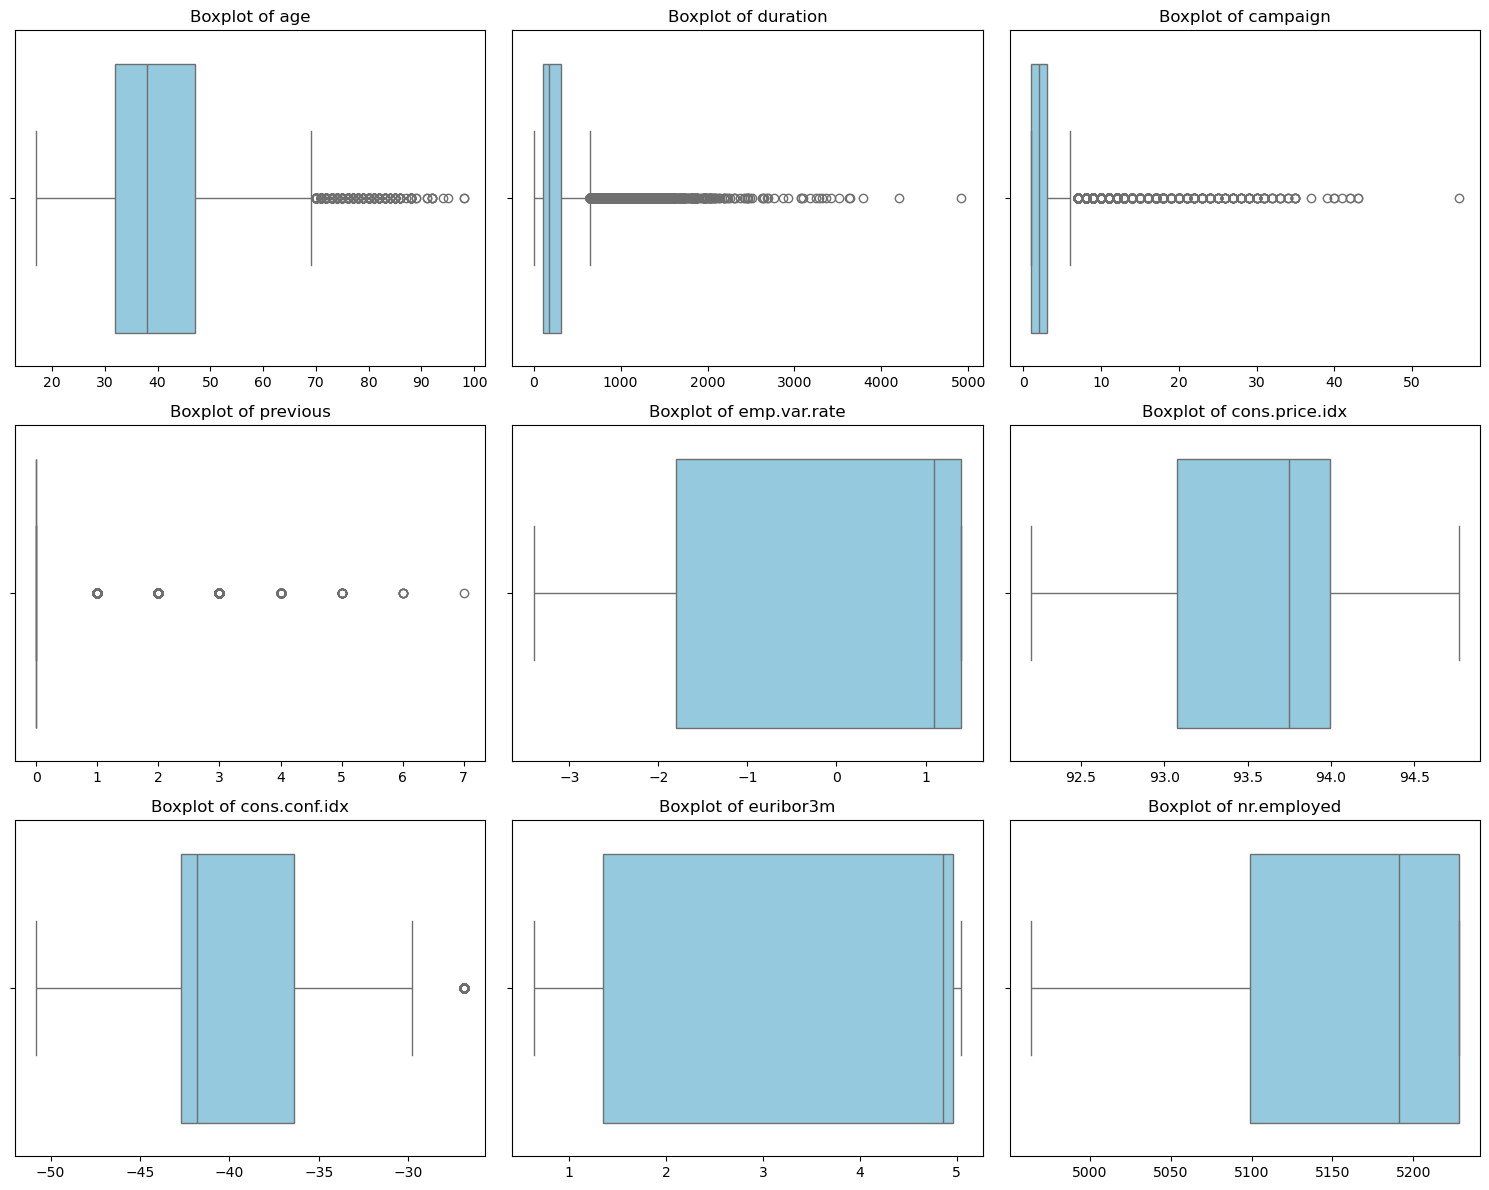

Jumlah Outliers per Kolom (Metode IQR):


age                468
duration          2963
campaign          2406
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      446
euribor3m            0
nr.employed          0
dtype: int64

In [10]:
# Check Outliers Feature Numbers (Bukan Kategori Yang Di Buat Numbers)
numeric_cols = ['age', 'duration', 'campaign', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']

# Create the plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Calculate Outlier Counts for Analysis
outlier_report = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_report[col] = len(outliers)

print("Jumlah Outliers per Kolom (Metode IQR):")
display(pd.Series(outlier_report))

**Rencana Penanganan Outliers & Strategi Fitur**

Berdasarkan analisis visual boxplot dan pemahaman konteks bisnis perbankan (*domain knowledge*), tidak semua *outlier* merupakan data yang salah (*error*). Beberapa di antaranya merupakan sinyal perilaku nasabah yang penting.

Tabel berikut merangkum keputusan dan tindakan teknis (*preprocessing*) yang akan diambil untuk setiap variabel numerik sebelum pemodelan:

| Nama Variabel | Status Outlier | Penjelasan Konteks | **Action Plan (Tindakan)** |
| :--- | :--- | :--- | :--- |
| **`duration`** | 🔴 **CRITICAL** | **Risiko Data Leakage**. Durasi panggilan baru diketahui *setelah* telepon selesai. Menggunakan variabel ini untuk memprediksi *sebelum* menelepon adalah kesalahan metodologis fatal.| **DROP COLUMN**. Hapus kolom ini sepenuhnya dari fitur modeling prediksi. Hanya akan digunakan untuk analisa data history, **TIDAK DI MODELING** |
| **`age`** | 🟢 Natural | Outliers mewakili nasabah lansia/pensiunan (usia > 70). Kelompok ini adalah target valid untuk produk deposito. | **KEEP**. Tidak perlu tindakan. Algoritma *tree-based* (seperti Random Forest/XGBoost) dapat menangani sebaran ini dengan baik. |
| **`campaign`** | 🟡 Noise / Inefficiency | Jumlah kontak > 15-20 kali dalam satu kampanye cenderung bersifat *spamming*, tidak efektif, dan menciptakan *noise*. | **CAPPING**. Batasi nilai ekstrem (misal: nilai > 15 diubah menjadi 15) untuk menjaga stabilitas model tanpa membuang data nasabah. |
| **`previous`** | 🟢 Structural | Data sangat miring (*skewed*) karena mayoritas nasabah adalah prospek baru (nilai 0). Nilai > 0 adalah info retensi berharga. | **KEEP**. Pertahankan apa adanya. Alternatif: Buat fitur baru `is_previously_contacted` (0/1). |
| **`pdays`** | 🔵 Hidden Category | Nilai 999 mendominasi, yang berarti "belum pernah dikontak". Ini bukan outlier numerik, tapi kode kategori. | **TRANSFORM**. Jangan gunakan sebagai numerik murni. Ubah 999 menjadi -1 atau buat fitur baru `is_new_customer`. |
| **`cons.conf.idx`** | 🟢 Macro Cycle | Fluktuasi indeks kepercayaan konsumen adalah hal wajar dalam siklus ekonomi. | **KEEP**. Data ini valid secara ekonomi dan memberikan konteks makro pada model. |
| **`euribor3m`** | 🟢 Valid | Tingkat suku bunga bank (Euribor). Variasi data mencerminkan kondisi pasar nyata. | **KEEP**. Data valid. |
| **`nr.employed`** | 🟢 Valid | Indikator jumlah tenaga kerja nasional. | **KEEP**. Data valid. |

**Rangkuman Keputusan Penting:**

1.  **Penghapusan Fitur `duration`:** Langkah ini wajib dilakukan untuk mencegah model menjadi bias dan tidak realistis saat diimplementasikan (model tidak boleh "mengintip" masa depan).
2.  **Penanganan `campaign`:** Kita akan melakukan *Winsorizing* (Capping) untuk mengurangi dampak kontak berlebihan yang tidak wajar.
3.  **Konteks `pdays`:** Variabel ini akan diperlakukan secara khusus karena mengandung nilai 999 yang bersifat kategorikal, bukan numerik kontinu.

# **FEATURE GENERATION**

## **1. MEMBUAT KOLOM ``is_previously_contacted``**

In [11]:
# Membuat Sebuah Kolom Baru Dari Pdays

df['is_previously_contacted'] = np.where(df['pdays'] == 999, 0, 1)

print("\nNew column 'is_previously_contacted' distribution:")
print(df['is_previously_contacted'].value_counts(normalize=True)*100)
print('-'*50)
print("Cross-check with original 'pdays' (999 vs others):")
print(df['pdays'].value_counts().head())


New column 'is_previously_contacted' distribution:
is_previously_contacted
0    96.320672
1     3.679328
Name: proportion, dtype: float64
--------------------------------------------------
Cross-check with original 'pdays' (999 vs others):
pdays
999    39661
3        439
6        412
4        118
9         64
Name: count, dtype: int64


Kolom pdays didominasi oleh nilai 999 yang berarti "nasabah belum pernah dihubungi sebelumnya". Menggunakan 999 sebagai angka numerik akan merusak model (karena 999 jauh lebih besar dari 3, 6, 10, dsb, padahal maknanya cuma kode kategori).

Oleh karena itu, dibuat fitur baru is_previously_contacted:
- Nilai 0 (False): Berasal dari pdays = 999 (Mayoritas: 96.3% nasabah). Artinya ini adalah nasabah cold calling / baru.
- Nilai 1 (True): Berasal dari pdays != 999 (Minoritas: 3.7% nasabah). Artinya nasabah ini pernah dihubungi di kampanye sebelumnya.

Pertanyaannya, kenapa harus dilakukan Pengelompokan? Berikut Alasannya

**1. Masalah Distorsi Numerik ("999" itu Kode, Bukan Jarak)**

Dalam matematika, angka 999 itu 333 kali lipat lebih besar daripada angka 3. Namun dalam konteks data ini:
- pdays = 3: Artinya nasabah dihubungi 3 hari lalu (Baru saja).
- pdays = 999: Artinya nasabah belum pernah dihubungi.

Jika kita masukkan angka mentah ini ke dalam model (seperti Regresi Logistik), model akan "tertipu". Model akan mengira bahwa nasabah dengan nilai 999 memiliki bobot atau jarak yang sangat jauh lebih besar dibandingkan nasabah dengan nilai 3. Padahal, 999 itu hanyalah label atau kode untuk "Tidak Ada Data", bukan jarak waktu yang sesungguhnya (seperti 999 hari).

**2. Dominasi Data (Masalah Imbalance)**

Mari lihat faktanya: Lebih dari 96% data bernilai 999. Hanya sekitar 3% data yang memiliki nilai numerik asli (seperti 3, 6, 12 hari).

Jika kita memaksakan ini menjadi variabel numerik, variasi kecil pada 3% data tersebut (misal beda antara 3 hari dan 6 hari) akan "tenggelam" karena model sibuk mencoba menyesuaikan diri dengan mayoritas data yang bernilai 999. Dengan mengubahnya menjadi 2 kategori:
- Kelompok A (Cold Leads): Belum pernah dihubungi (pdays=999).
- Kelompok B (Warm Leads): Sudah pernah dihubungi (pdays!=999). Kita membantu model untuk fokus pada perbedaan perilaku yang paling mendasar: Apakah nasabah ini orang baru atau orang lama? Perbedaan ini jauh lebih signifikan dampaknya terhadap konversi daripada perbedaan apakah dia dihubungi 3 hari lalu vs 6 hari lalu.

## **CAPPING VARIABLE ``Campaign``**

**Konteks :**

Capping secara teknis "memanipulasi" data asli (misal: nasabah yang ditelepon 50 kali dianggap sama dengan yang ditelepon 15 kali). Namun, dalam konteks Data Science untuk bisnis, keputusan ini diambil berdasarkan Trade-off antara Akurasi Statistik vs. Efektivitas Model. Mari kita bedah mengapa Capping (Winsorizing) perlu dilakukan.

**Fakta Data: Diminishing Returns**
Kami telah memeriksa tingkat konversi berdasarkan jumlah panggilan (campaign). Hasilnya adalah:
- Panggilan 1-3: Tingkat konversi tinggi (13% turun ke 10%). Di sini, setiap perbedaan 1 panggilan sangat berarti.
- Panggilan > 15: Dari ribuan data, hanya ada 5 nasabah yang akhirnya "Yes" setelah ditelepon lebih dari 15 kali. Sebagian besar nasabah yang ditelepon 20, 30, atau 56 kali memiliki tingkat konversi 0%.

**Kesimpulan:** Secara perilaku bisnis, nasabah yang sudah ditelepon 15 kali dengan nasabah yang ditelepon 56 kali memiliki karakteristik yang sama: Mereka menolak / terganggu. Membedakan antara angka 20 dan 50 tidak memberikan nilai tambah bagi model, karena keduanya adalah sinyal "Gagal". Oleh karena itu, menyamakan mereka (Capping) di angka 15 adalah representasi realitas yang aman.

In [12]:
# Capping Campaign

print("Original 'campaign' stats:")
print(df['campaign'].describe())

CAP_THRESHOLD = 15

df['campaign_capped'] = df['campaign'].apply(lambda x: CAP_THRESHOLD if x > CAP_THRESHOLD else x)

print(f"\n'campaign' stats after capping at {CAP_THRESHOLD}:")
print(df['campaign_capped'].describe())

capped_count = (df['campaign'] > CAP_THRESHOLD).sum()
print(f"Number of records capped: {capped_count}")

Original 'campaign' stats:
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

'campaign' stats after capping at 15:
count    41176.000000
mean         2.510152
std          2.352246
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: campaign_capped, dtype: float64
Number of records capped: 355


Nilai campaign yang ekstrim (menghubungi nasabah lebih dari 15 kali) telah dibatasi (capped) menjadi 15.
- Sebelum: Nilai maksimum adalah 56 kali kontak (sangat tidak wajar/spamming).
- Sesudah: Nilai maksimum menjadi 15.
- Dampak: Sebanyak 355 data (nasabah) nilainya disesuaikan. Ini membantu menstabilkan model tanpa membuang data nasabah tersebut. Distribusi data menjadi lebih rapat (standar deviasi turun dari 2.77 menjadi 2.35).

## **3. MEMBUAT KATEGORISASI GENERASI (DARI FEATURE ``Age``)**

In [13]:
# Generation Marketing

REFERENCE_YEAR = 2014

def map_generation(age):
    """
    Memetakan usia ke dalam kelompok generasi berdasarkan tahun kelahiran.
    Reference Year: 2014 (Tahun data diambil).
    """
    birth_year = REFERENCE_YEAR - int(age)

    if 1946 <= birth_year <= 1964:
        return 'Baby Boomer'
    elif 1965 <= birth_year <= 1979:
        return 'Generation X'
    elif 1980 <= birth_year <= 1994:
        return 'Millennials'
    elif 1995 <= birth_year <= 2012:
        return 'Generation Z'
    else:
        # Menampung Silent Generation (Lahir < 1946)
        return 'Silent Gen / Other'

if 'generation' not in df.columns:
    df['generation'] = df['age'].apply(map_generation)

print(df['generation'].value_counts())

generation
Generation X          18372
Millennials           14676
Baby Boomer            7551
Silent Gen / Other      502
Generation Z             75
Name: count, dtype: int64


**Source : [BAI on "banking attitudes, generation-by-generation"](www.bai.org)**

Laporan BAI (penyedia layanan & advisory finansial terkait perbankan), memberikan insight perilaku bank khusus untuk:
tahun lahir = 2014-umur

1. Baby Boomers : 1946–1964 (usia 61–79 tahun)
2. Gen X        : 1965–1979 (usia 46–60 tahun)
3. Millennials  : 1980–1994 (usia 31–45 tahun)

BAI **tidak** memberikan analisis rinci untuk generasi:

- Gen Z (lahir 1995–2010) yang masih sangat muda atau belum menjadi target deposito jangka panjang
- Silent Generation (>80 tahun)
- Anak-anak (<18 tahun)

Karena dataset bank telemarketing Portugal berfokus pada produk term deposit (produk investasi berbasis bunga yang memerlukan kapasitas finansial), maka yang relevan dengan studi perilaku finansial menurut BAI.org adalah ketiga generasi tersebut.

## **4. FINAL PREVIEW & SAVE CLEAN DATA**

In [14]:
# Preview Final Data

df.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_previously_contacted,campaign_capped,generation
40428,58,technician,married,basic.9y,no,yes,no,cellular,aug,mon,324,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes,0,1,Baby Boomer
37820,50,admin.,married,university.degree,no,no,yes,cellular,aug,thu,460,1,15,2,failure,-2.9,92.201,-31.4,0.829,5076.2,yes,1,1,Baby Boomer
3536,39,technician,married,professional.course,no,yes,no,telephone,may,fri,159,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,0,1,Generation X
17710,50,management,divorced,high.school,no,no,no,cellular,jul,tue,36,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0,1,Baby Boomer
15853,32,admin.,married,high.school,no,yes,no,telephone,jul,mon,107,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,3,Millennials
21599,33,technician,single,university.degree,no,yes,no,cellular,aug,tue,116,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,0,1,Millennials
20142,30,admin.,single,university.degree,no,yes,no,cellular,aug,mon,128,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,0,1,Millennials
5163,56,retired,married,high.school,unknown,no,no,telephone,may,fri,319,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,3,Baby Boomer
7958,28,blue-collar,single,high.school,no,yes,no,telephone,jun,mon,102,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,2,Millennials
10760,39,admin.,married,university.degree,no,no,no,telephone,jun,tue,979,9,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,0,9,Generation X


In [15]:
# Save Clean Data To Csv

df.to_csv('Term Deposit Clean.csv', index=False)

# **DATA ANALYSIS**

## **1. DISTRIBUSI NASABAH BERLANGGANAN VS TIDAK BERLANGGANAN**

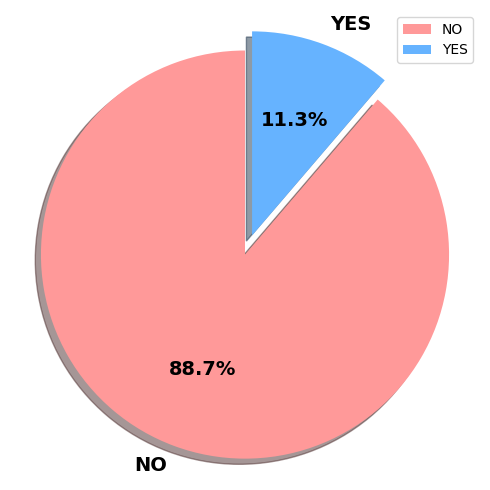

In [16]:
plt.figure(figsize=(5, 5))
y_counts = df['y'].value_counts()
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)  
explode = (0, 0.1) 

plt.pie(y_counts, labels=y_counts.index.str.upper(), autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.legend()

plt.show()

Visualisasi diatas memperlihatkan ketimpangan yang sangat jelas antara keberhasilan dan kegagalan kampanye.

**Penjelasan Distribusi:**
- Dominasi Penolakan (NO - 88.7%): Mayoritas absolut dari upaya telemarketing berakhir dengan penolakan. Dari 41.188 nasabah yang dihubungi, sekitar 36.500 di antaranya tidak menghasilkan nilai bisnis (revenue) langsung.
- Tingkat Konversi Rendah (YES - 11.3%): Hanya sebagian kecil nasabah yang berhasil dikonversi.
- Implikasi: Ini mengkonfirmasi urgensi masalah efisiensi biaya. Bank mengeluarkan biaya operasional penuh (100%) hanya untuk mendapatkan hasil dari 11.3% target. Strategi ke depan harus berfokus pada "Who to Call" (siapa yang harus ditelepon) untuk menghindari pemborosan pada segmen biru (No) yang terlalu besar.

## **2. COST VS DURATION**

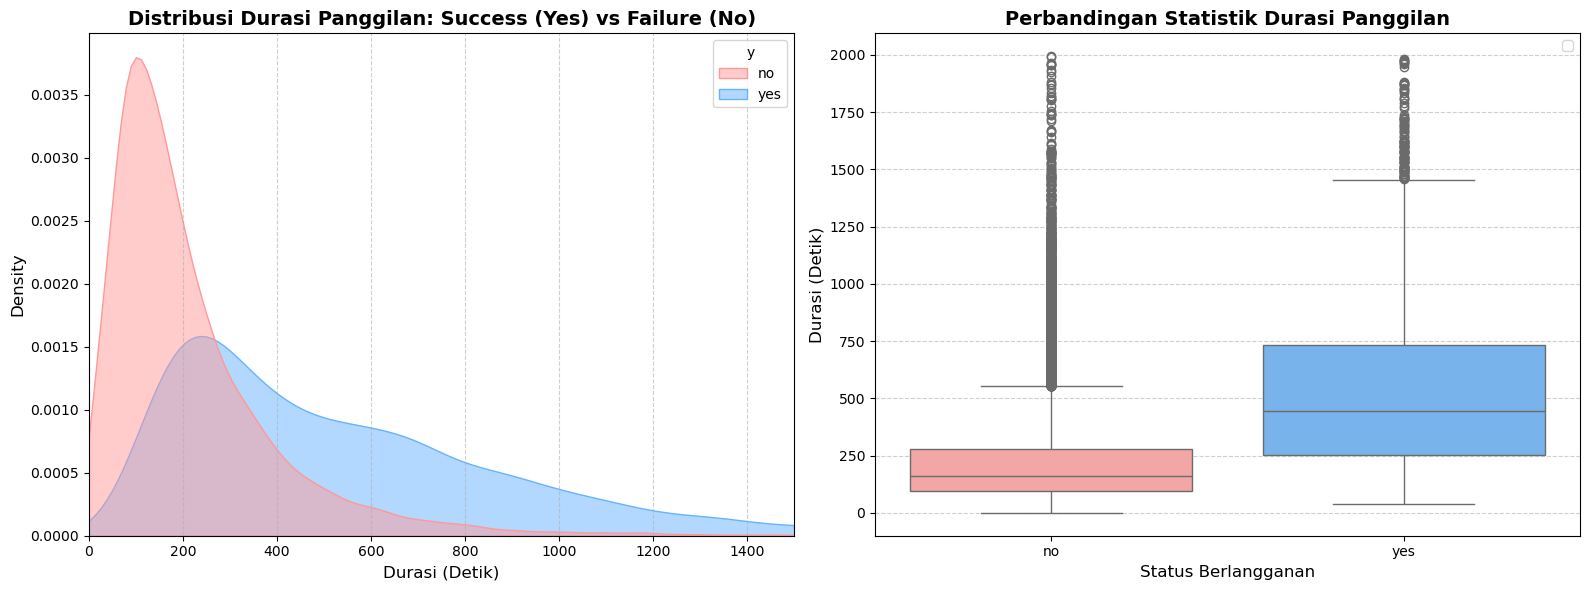

In [17]:
# Filter for visualization
df_vis = df[df['duration'] < 2000].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: KDE Plot (Density)
sns.kdeplot(data=df_vis, x='duration', hue='y', fill=True, common_norm=False, palette=['#ff9999', '#66b3ff'], alpha=0.5, ax=axes[0])
axes[0].set_title('Distribusi Durasi Panggilan: Success (Yes) vs Failure (No)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Durasi (Detik)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_xlim(0, 1500)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# Plot B: Boxplot
sns.boxplot(x='y', y='duration', data=df_vis, palette=colors, order=['no', 'yes'], ax=axes[1])
axes[1].set_title('Perbandingan Statistik Durasi Panggilan', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Status Berlangganan', fontsize=12)
axes[1].set_ylabel('Durasi (Detik)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.legend()
plt.show()

In [18]:
# Conversion rate by minute
df['duration_min'] = df['duration'] // 60
conversion_stats = df.groupby('duration_min')['y'].apply(lambda x: (x=='yes').mean()).reset_index(name='conversion_rate')
volume_stats = df.groupby('duration_min')['y'].count().reset_index(name='volume')
stats_merged = pd.merge(conversion_stats, volume_stats, on='duration_min')
print("Stats for duration analysis:")
print(stats_merged.head(20))
print(f"Median Duration YES: {df[df['y']=='yes']['duration'].median()}")
print(f"Median Duration NO: {df[df['y']=='no']['duration'].median()}")

Stats for duration analysis:
    duration_min  conversion_rate  volume
0              0         0.000239    4179
1              1         0.018927    8612
2              2         0.050591    7788
3              3         0.089192    5505
4              4         0.119407    3844
5              5         0.137043    2678
6              6         0.167708    1920
7              7         0.193139    1341
8              8         0.240976    1025
9              9         0.305211     806
10            10         0.353474     662
11            11         0.431068     515
12            12         0.418491     411
13            13         0.440922     347
14            14         0.567568     259
15            15         0.593301     209
16            16         0.576471     170
17            17         0.630137     146
18            18         0.574627     134
19            19         0.454545     110
Median Duration YES: 449.0
Median Duration NO: 164.0


**Analisis Durasi Panggilan vs Keberhasilan**

Notes :
- Grafik Kiri (Density Plot): Membandingkan pola durasi panggilan Gagal (Merah) vs Sukses (Biru).
- Grafik Kanan (Boxplot): Memperlihatkan perbedaan statistik durasi secara jelas.

Berdasarkan visualisasi dan data statistik di atas, berikut adalah pola perilaku yang ditemukan:
1. Zona "Cepat Menolak" (< 3 Menit)
    - Fakta: Grafik merah (No) memuncak tajam di area 0-180 detik. Median durasi untuk panggilan gagal hanya 164 detik (2 menit 44 detik).
    - Analisis: Jika nasabah tidak menunjukkan ketertarikan di 2-3 menit pertama, probabilitas mereka untuk closing sangat kecil (hanya sekitar 5% di menit ke-2). Agen seringkali membuang waktu dengan mencoba memaksa percakapan yang sudah "mati" sejak awal.

2. Zona "Konversi Efektif" (3 - 10 Menit)
    - Fakta: Kurva biru (Yes) melebar dan memuncak di sekitar durasi ini. Median durasi sukses adalah 449 detik (7.5 menit).
    - Analisis: Ini adalah durasi ideal. Nasabah yang serius akan banyak bertanya, menyebabkan durasi memanjang. Tingkat konversi melonjak dari 8.9% (menit ke-3) menjadi 35.3% (menit ke-10).

3. Titik "Diminishing Return" (> 12 Menit)
    - Fakta: Setelah menit ke-12, volume panggilan turun drastis (sangat jarang terjadi), namun tingkat konversi tidak lagi naik secara signifikan melainkan fluktuatif.
    - Analisis: Panggilan mulai dianggap membuang biaya jika melewati durasi 12 menit tanpa tanda-tanda closing. Meskipun ada peluang konversi, biaya opportunity cost (kehilangan kesempatan menelepon nasabah lain) menjadi terlalu mahal.

**Rekomendasi Action:** 

Tetapkan Soft Limit di sistem telemarketing pada menit ke-10 sebagai pengingat bagi agen, dan Hard Evaluation pada menit ke-12. Jika pembicaraan berlarut-larut tanpa arah yang jelas di atas 12 menit, agen disarankan untuk mengakhiri panggilan dengan sopan untuk menjaga efisiensi operasional.

## **3. EFEKTIVITAS FREKUENSI KONTAK**

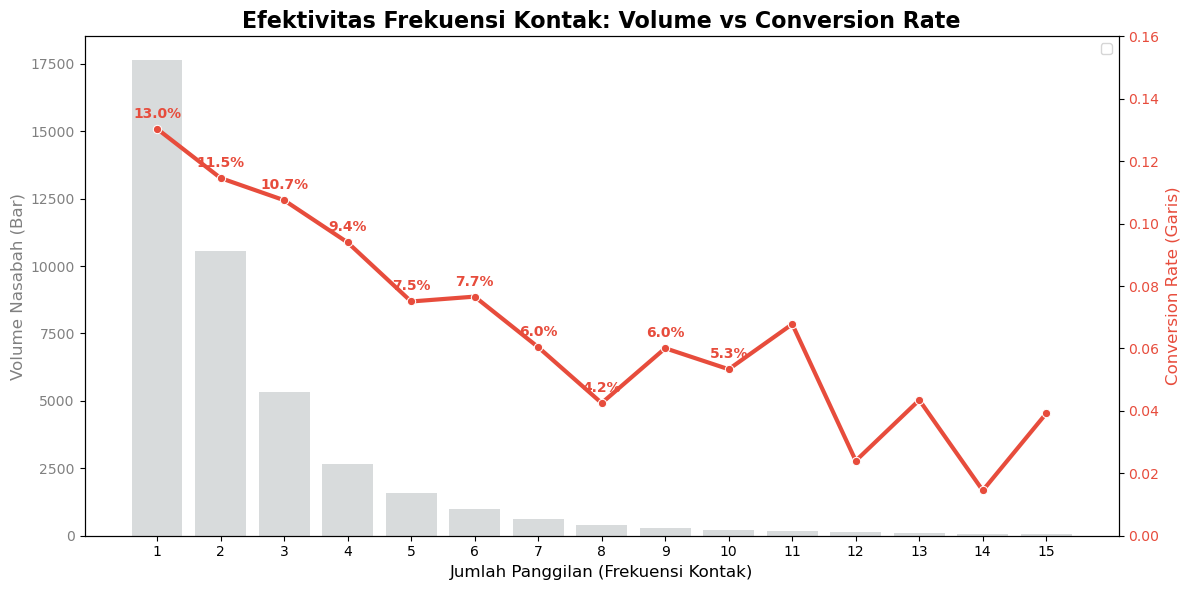

In [19]:
# Feature Bantuan
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

campaign_stats = df.groupby('campaign').agg(
    total_clients=('y_num', 'count'),
    conversion_rate=('y_num', 'mean')
).reset_index()

campaign_vis = campaign_stats[campaign_stats['campaign'] <= 15]

# --- Visualization: Dual Axis Chart ---
fig, ax1 = plt.subplots(figsize=(12, 6))

color_bar = '#bdc3c7' # Grey
sns.barplot(x='campaign', y='total_clients', data=campaign_vis, color=color_bar, alpha=0.6, ax=ax1)
ax1.set_xlabel('Jumlah Panggilan (Frekuensi Kontak)', fontsize=12)
ax1.set_ylabel('Volume Nasabah (Bar)', fontsize=12, color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
color_line = '#e74c3c' # Red
sns.lineplot(x=campaign_vis.index, y='conversion_rate', data=campaign_vis, color=color_line, marker='o', linewidth=3, ax=ax2)
ax2.set_ylabel('Conversion Rate (Garis)', fontsize=12, color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.set_ylim(0, 0.16) # Set limit to make the trend clearer (max is around 13-14%)

# Add data labels for Conversion Rate
for i, txt in enumerate(campaign_vis['conversion_rate']):
    if i < 10: # Only label the first 10 for clarity
        ax2.annotate(f'{txt*100:.1f}%', (i, txt), xytext=(0, 8), textcoords='offset points', ha='center', color=color_line, fontweight='bold')

plt.title('Efektivitas Frekuensi Kontak: Volume vs Conversion Rate', fontsize=16, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

**Analisis ini menjawab apakah strategi "menelepon berulang kali" (spamming) efektif atau justru merugikan.**

Gambar: Grafik Efisiensi Panggilan
- Bar Abu-abu (Volume): Jumlah nasabah yang dihubungi pada frekuensi ke-X.
- Garis Merah (Conversion Rate): Persentase keberhasilan pada frekuensi tersebut.


1. **"The Golden First Call" (Panggilan Pertama adalah Penentu)**
    - Fakta: Tingkat konversi tertinggi terjadi pada panggilan pertama (13.0%).
    - Tren: Begitu masuk ke panggilan kedua, peluang langsung turun menjadi 11.4%, dan terus merosot secara konsisten.
    - Insight: Jika nasabah tidak tertarik pada kontak pertama atau kedua, kemungkinan mereka berubah pikiran di panggilan ketiga sangat kecil. Kesan pertama sangat krusial.

2. **Titik Jenuh (Diminishing Return) di Panggilan ke-4**
    - Pada panggilan ke-4, konversi turun menjadi 9.4%.
    - Setelah panggilan ke-5, grafik merah mulai menukik tajam ke bawah (hanya ~7% dan terus turun).
    - Analisis Biaya: Setiap panggilan tambahan memerlukan biaya pulsa dan gaji agen. Menelepon orang yang sama untuk ke-6 kalinya hanya memberikan peluang sukses 7%, yang berarti 93% biaya yang dikeluarkan untuk panggilan tersebut hangus sia-sia.

3. **Zona Pemborosan ("Spam Zone" > 10 Panggilan)**
    - Data menunjukkan ada 869 nasabah yang ditelepon lebih dari 10 kali.
    - Dari 869 usaha keras tersebut, hanya 27 nasabah yang closing.
    - Conversion Rate: Sangat rendah (~3%).
    - Risiko Reputasi: Menelepon seseorang lebih dari 10 kali bukan lagi "marketing", melainkan "gangguan". Ini berpotensi merusak citra bank dan menyebabkan nasabah memblokir nomor bank di masa depan.

Dari penjelasan diatas, maka dapat disimpulkan bahwa secara garis besar
**Meningkatkan jumlah panggilan TIDAK meningkatkan peluang konversi secara proporsional, justru menciptakan inefisiensi biaya yang masif.**

Strategi agresif dengan frekuensi tinggi adalah pemborosan. Grafik menunjukkan hubungan negatif yang kuat: semakin sering ditelepon, semakin kecil kemungkinan nasabah membeli.

**Rekomendasi Action:**
- Batasi Frekuensi (Capping): Terapkan aturan sistem hard-stop maksimal 3-4 kali panggilan per nasabah dalam satu periode kampanye.
- Prioritas Ulang: Jika setelah 3 kali panggilan tidak ada respon positif, leads tersebut harus dipindahkan ke status "Low Priority" atau "Dormant", dan agen harus dialihkan untuk menghubungi leads baru yang masih segar (belum pernah ditelepon).
- Strategi Kontak: Daripada menelepon 10 kali, lebih baik gunakan kanal lain yang lebih murah dan tidak intrusif untuk follow-up, seperti email atau SMS/WhatsApp blast setelah panggilan ke-3 gagal.

## **4. PROFIL DEMOGRAFI TINGKAT RESIKO RENDAH**

In [20]:
# Mengonversi target 'y' menjadi numerik (1 untuk yes, 0 untuk no)
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Fungsi untuk membuat analisis dan plot dengan urutan tertentu & highlight unknown
def analyze_demographic_ordered(col_name, title_name, order_list, base_palette_name='viridis', unknown_color='#95a5a6'):
    # Mengelompokkan data berdasarkan kolom untuk mendapatkan statistik
    stats = df.groupby(col_name).agg(
        Count=('y_num', 'count'),
        Conversion_Rate=('y_num', 'mean')
    ).reset_index()
    
    # Mengatur ulang indeks sesuai urutan yang diinginkan (order_list)
    stats = stats.set_index(col_name).reindex(order_list).reset_index()
    
    # Logika Pewarnaan: Membuat list warna
    n_colors = len(order_list)
    # Mengambil palet warna dasar
    base_colors = sns.color_palette(base_palette_name, n_colors)
    
    final_colors = []
    # Iterasi untuk menetapkan warna abu-abu pada 'unknown', sisanya sesuai palet
    for i, category in enumerate(order_list):
        if str(category).lower() == 'unknown':
            final_colors.append(unknown_color) # Warna abu-abu untuk unknown
        else:
            final_colors.append(base_colors[i])
    
    # Membuat Plot
    plt.figure(figsize=(10, 6))
    
    # Bar plot dengan urutan dan warna yang sudah ditentukan
    ax = sns.barplot(x='Conversion_Rate', y=col_name, data=stats, order=order_list, palette=final_colors)
    
    # Menambahkan label angka di setiap bar
    for i, p in enumerate(ax.patches):
        # Menangani kategori yang mungkin kosong
        if pd.isna(p.get_width()): 
            continue
        width = p.get_width()
        try:
            count = int(stats.iloc[i]['Count'])
        except:
            count = 0
            
        # Format teks: Persentase (Jumlah data)
        label_text = f'{width:.1%}\n(n={count})'
        ax.text(width + 0.005, p.get_y() + p.get_height()/2, label_text, 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')
        
    # Mengatur judul dan label sumbu
    plt.title(f'Tingkat Konversi Berdasarkan {title_name}', fontsize=15, fontweight='bold')
    plt.xlabel('Conversion Rate', fontsize=12)
    plt.ylabel(title_name, fontsize=12)
    plt.xlim(0, stats['Conversion_Rate'].max() * 1.25) # Memberikan ruang untuk label
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return stats

### **4.1 Tingkat Pendidikan**

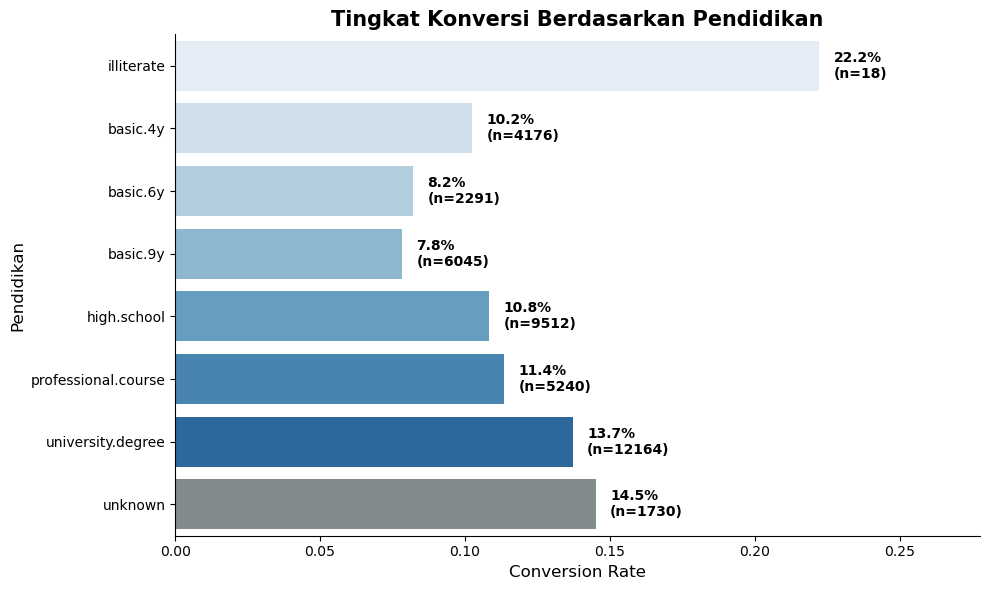

In [21]:
# --- 1. Analisis Pendidikan (Education) - Berurutan ---
edu_order = [
    'illiterate', 
    'basic.4y', 
    'basic.6y', 
    'basic.9y', 
    'high.school', 
    'professional.course', 
    'university.degree', 
    'unknown'
]

edu_stats = analyze_demographic_ordered('education', 'Pendidikan', edu_order, 'Blues', '#7f8c8d')

**Analisis Tren Pendidikan:**

1. **Pola U-Shape yang Unik:**
    - Tingkat konversi Sangat Tinggi di ekstrem bawah (Illiterate - 22%) dan Tinggi di ekstrem atas (University - 13.7%).
    - Tingkat konversi Terendah justru ada di tengah-tengah, yaitu kelompok pendidikan dasar (Basic 9y - 7.8%).

2. **Insight:**
    - Nasabah University Degree cenderung berinvestasi karena literasi finansial yang baik.
    - Nasabah Illiterate (walau jumlahnya sedikit) mungkin sangat loyal atau bergantung pada saran personal dari agen bank (trust-based).
    - Nasabah pendidikan menengah bawah (Basic 9y) mungkin merupakan segmen ekonomi paling rentan yang fokus pada pemenuhan kebutuhan dasar dibanding investasi.

3. **Faktor Unknown (Abu-abu - 14.5%):** Nilai konversi yang tinggi pada kategori Unknown mengindikasikan bahwa nasabah yang tidak mau mengungkap pendidikan mereka justru adalah prospek yang sangat potensial (mungkin High Net Worth Individuals yang menjaga privasi).

Note : Grafik ini disusun mulai dari tingkat pendidikan terendah (Illiterate) hingga tertinggi (University Degree), dengan Unknown dipisahkan di akhir.

### **4.2 Generasi**

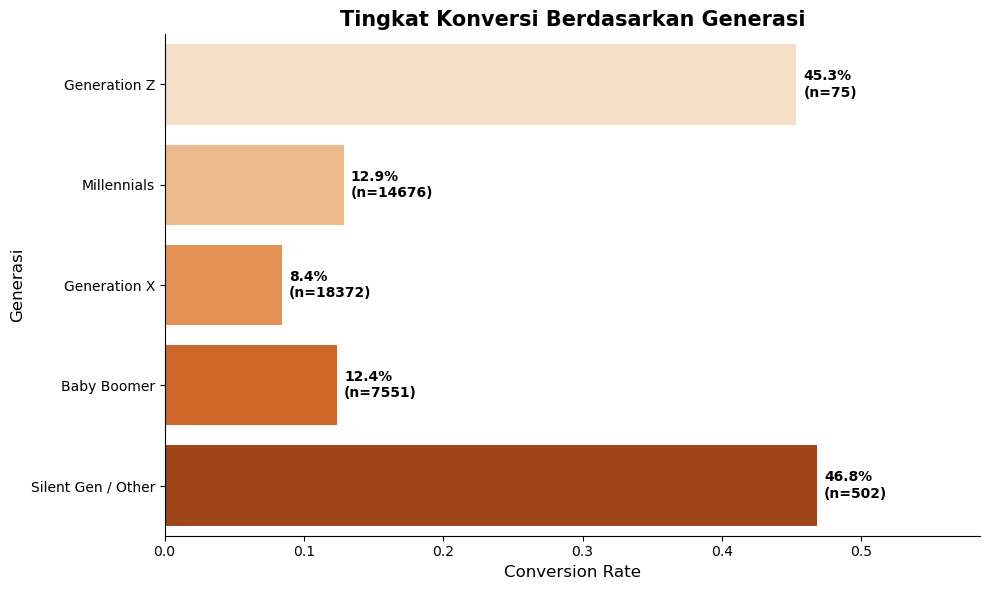

In [23]:
# --- 2. Analisis Generasi (Generation) - Berurutan -
gen_order = [
    'Generation Z', 
    'Millennials', 
    'Generation X', 
    'Baby Boomer', 
    'Silent Gen / Other' 
]

# Menggunakan palet Oranges
gen_stats = analyze_demographic_ordered('generation', 'Generasi', gen_order, 'Oranges')

**Analisis Tren Generasi:**

1. Pola "Smile Curve" (Kurva Senyum):
    - Tinggi di Awal: Gen Z (45%) sangat antusias.
    - Turun di Tengah: Minat turun drastis saat memasuki usia produktif-keluarga (Millennials 12% -> Gen X 8%).
    - Naik Lagi di Akhir: Minat melonjak kembali saat memasuki usia pensiun (Baby Boomers 12% -> Silent Gen 46%).

2. **Insight Strategis:**
    - Gen X adalah "Lembah Kematian": Usia 35-50 tahun adalah masa pengeluaran tertinggi (rumah, anak), sehingga dana menganggur (idle money) untuk deposito sangat minim.
    - Targeting Emas: Fokuslah pada dua ujung spektrum usia: Nasabah yang baru mulai mengenal uang (Gen Z) dan nasabah yang sudah mapan menikmati uang (Silent Gen).

Notes : Grafik ini disusun berdasarkan usia, mulai dari yang termuda (Gen Z) hingga tertua (Silent Gen).

### **4.3 Pekerjaan**

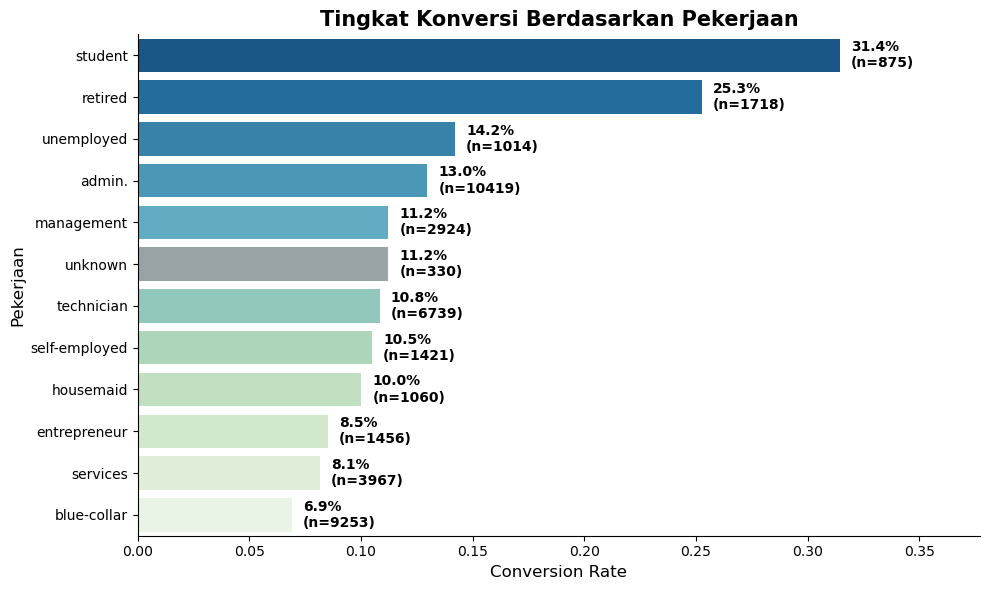

In [24]:
# --- 3. Analisis Pekerjaan (Job) - Highlight Unknown ---
# Khusus Job: Diurutkan berdasarkan performa (karena tidak ada hierarki baku), tapi unknown di-highlight
def analyze_job_with_highlight_indo():
    # Hitung statistik
    stats = df.groupby('job').agg(
        Count=('y_num', 'count'),
        Conversion_Rate=('y_num', 'mean')
    ).sort_values(by='Conversion_Rate', ascending=False).reset_index()
    
    # Logika Warna
    colors = []
    base_palette = sns.color_palette('GnBu_r', len(stats))
    
    for i, row in stats.iterrows():
        if row['job'] == 'unknown':
            colors.append('#95a5a6') # Abu-abu untuk unknown
        else:
            colors.append(base_palette[i])
            
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Conversion_Rate', y='job', data=stats, palette=colors)
    
    # Labeling
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        count = stats.iloc[i]['Count']
        label_text = f'{width:.1%}\n(n={count})'
        ax.text(width + 0.005, p.get_y() + p.get_height()/2, label_text, 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')
        
    plt.title('Tingkat Konversi Berdasarkan Pekerjaan', fontsize=15, fontweight='bold')
    plt.xlabel('Conversion Rate', fontsize=12)
    plt.ylabel('Pekerjaan', fontsize=12)
    plt.xlim(0, stats['Conversion_Rate'].max() * 1.2)
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return stats

job_stats = analyze_job_with_highlight_indo()

**Analisis:**

1. **Juara Konversi: Student (31.4%) & Retired (25.3%)** 
    
    Kelompok Pelajar dan Pensiunan memiliki tingkat kesuksesan yang fenomenal, jauh di atas rata-rata kampanye (11%).
    
    - Why? Pensiunan cenderung memiliki dana mengendap (dana pensiun) dan mencari instrumen investasi aman (risk-averse). Pelajar, meskipun dananya mungkin lebih kecil (seringkali dari orang tua), cenderung memiliki literasi keuangan yang berkembang atau sedang menabung untuk masa depan tanpa beban tanggungan keluarga yang berat.

2. **Zona Merah: Blue-collar (6.9%) & Services (8.1%)** 

    Pekerja buruh kasar (blue-collar) dan sektor jasa adalah segmen terbesar secara volume (9.253 nasabah), namun memiliki konversi terendah.

    - Action: Mengurangi prioritas pada segmen ini akan secara drastis menurunkan biaya, mengingat "effort" menelepon 9.000 orang hanya menghasilkan return yang sangat kecil.

### **4.4 Key Take Away**

Tabel berikut merangkum matriks prioritas untuk strategi targeting yang lebih efisien berdasarkan analisis demografi (Usia, Pekerjaan, dan Pendidikan):

| Tier Prioritas | Segmen Demografi Utama | Alasan Bisnis & Karakteristik | Action Plan (Rekomendasi Strategis) |
| :--- | :--- | :--- | :--- |
| **🥇 PRIORITAS 1 (Platinum)** | **Silent Gen (>70 th)**, **Retired**, **Gen Z (<25 th)**, **Student** | **Conversion Rate > 25%**. Kelompok ini memiliki likuiditas tinggi (dana pensiun) atau motivasi awal menabung yang kuat. Hambatan finansial relatif minim. | **Wajib Telepon (Direct Call)**. Alokasikan agen *Top Performer* untuk melakukan pendekatan personal. Peluang *closing* sangat tinggi (1 dari 3 panggilan). |
| **🥈 PRIORITAS 2 (Gold)** | **University Degree**, **Unknown (Edu/Job)**, **Management** | **Conversion Rate ~13-14%**. Segmen terpelajar dan privat (*High Net Worth* yang menjaga privasi). Memiliki pemahaman produk investasi yang baik. | **Telepon Reguler**. Masukkan dalam *pipeline* harian agen standar. Tetap prospektif untuk menjaga volume penjualan. |
| **🥉 PRIORITAS 3 (Bronze/Low)** | **Gen X (35-50 th)**, **Blue-collar**, **Basic Education (9y)** | **Conversion Rate < 8%**. "Zona Kering" dengan beban finansial keluarga tertinggi (Cicilan, Anak). Sensitivitas harga tinggi, likuiditas rendah. | **Hindari Telepon (Low Cost Channel)**. Jangan habiskan waktu agen ("human hours"). Gunakan automasi seperti **Email/WA Blast** atau tawaran via Mobile App saja. |

## **5. OPTIMASI WAKTU KONTAK**

In [25]:
# --- Define Orders ---

# Chronological order for months
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Business week order
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# --- Helper Function for Dual Axis Plot ---
def plot_dual_axis(data, x_col, title, filename, order=None):
    # Ensure order
    if order:
        data = data.set_index(x_col).reindex(order).reset_index()
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Bar Plot (Volume) - Grey
    color_bar = '#bdc3c7' 
    sns.barplot(x=x_col, y='count', data=data, color=color_bar, alpha=0.6, ax=ax1)
    ax1.set_xlabel(x_col.capitalize(), fontsize=12)
    ax1.set_ylabel('Volume Panggilan (Bar)', fontsize=12, color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')
    
    # Line Plot (Conversion Rate) - Red
    ax2 = ax1.twinx()
    color_line = '#e74c3c'
    sns.lineplot(x=x_col, y='mean', data=data, color=color_line, marker='o', linewidth=3, sort=False, ax=ax2)
    ax2.set_ylabel('Conversion Rate (Garis)', fontsize=12, color=color_line)
    ax2.tick_params(axis='y', labelcolor=color_line)
    
    # Annotate Line Points
    for i, rate in enumerate(data['mean']):
        if pd.isna(rate): continue
        ax2.annotate(f'{rate*100:.1f}%', (i, rate), xytext=(0, 10), 
                     textcoords='offset points', ha='center', color=color_line, fontweight='bold')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

### **5.1 Berdasarkan Bulan**

--- Month Stats ---
       count      mean
month                 
mar      546  0.505495
apr     2631  0.204865
may    13767  0.064357
jun     5318  0.105115
jul     7169  0.090389
aug     6176  0.106056
sep      570  0.449123
oct      717  0.439331
nov     4100  0.101463
dec      182  0.489011


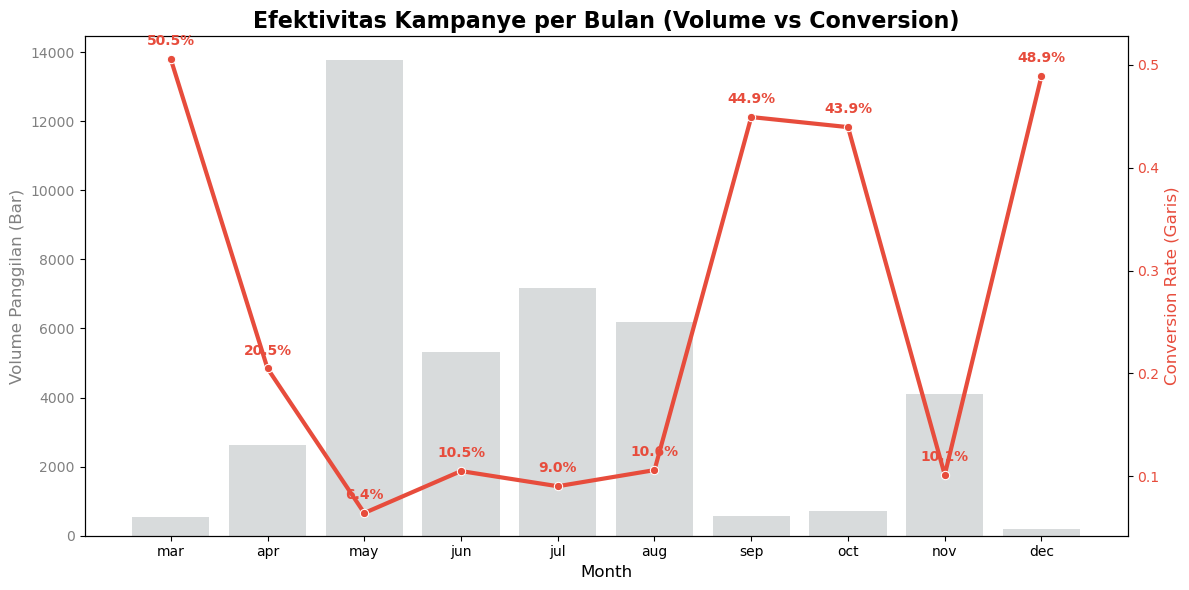

In [26]:
# --- 1. Month Analysis ---

month_stats = df.groupby('month')['y_num'].agg(['count', 'mean']).reset_index()
print("--- Month Stats ---")
print(month_stats.set_index('month').reindex(month_order))

plot_dual_axis(month_stats, 'month', 'Efektivitas Kampanye per Bulan (Volume vs Conversion)', 'analysis_month.png', month_order)

**Analisis Month Over Month:**

1. Zona Merah (Uang Terbakar): Bulan Mei
    - Fakta: Bulan Mei memiliki volume panggilan tertinggi (13.767 panggilan), namun Conversion Rate-nya adalah yang terendah (6.4%).
    - Insight: Secara operasional, bulan Mei adalah "Bulan Bencana". Tim telemarketing bekerja paling keras di bulan ini, menghabiskan biaya telepon dan lembur terbesar, namun panennya paling sedikit. Ini adalah definisi inefisiensi.

2. Zona Emas (High Profitability): Mar, Sep, Oct, Dec
    - Fakta: Bulan Maret, September, Oktober, dan Desember memiliki Conversion Rate fantastis di kisaran 44% - 50%.
    - Insight: Meskipun volumenya rendah (mungkin karena strategy shifting atau liburan), nasabah yang dihubungi di bulan-bulan ini sangat responsif.
        - Maret: Akhir kuartal 1, mungkin nasabah baru menerima bonus tahunan.
        - Sep/Oct: Periode back-to-work setelah libur musim panas Eropa.
        - Desember: Akhir tahun fiskal, nasabah mencari instrumen tax saving atau mengamankan bonus akhir tahun.

**Rekomendasi Strategis:**
- Kurangi Volume di Mei: Jangan membuang sumber daya di bulan Mei. Kurangi target panggilan hingga 50% dan alihkan budget ke bulan lain.
- Genjot di Q4 & Q1: Tingkatkan intensitas kampanye di bulan Maret, September, dan Oktober. Nasabah sedang dalam mood berinvestasi.

### **5.2 Berdasarkan Hari**


--- Day Stats ---
             count      mean
day_of_week                 
mon           8512  0.099507
tue           8086  0.117858
wed           8134  0.116671
thu           8618  0.121142
fri           7826  0.108101


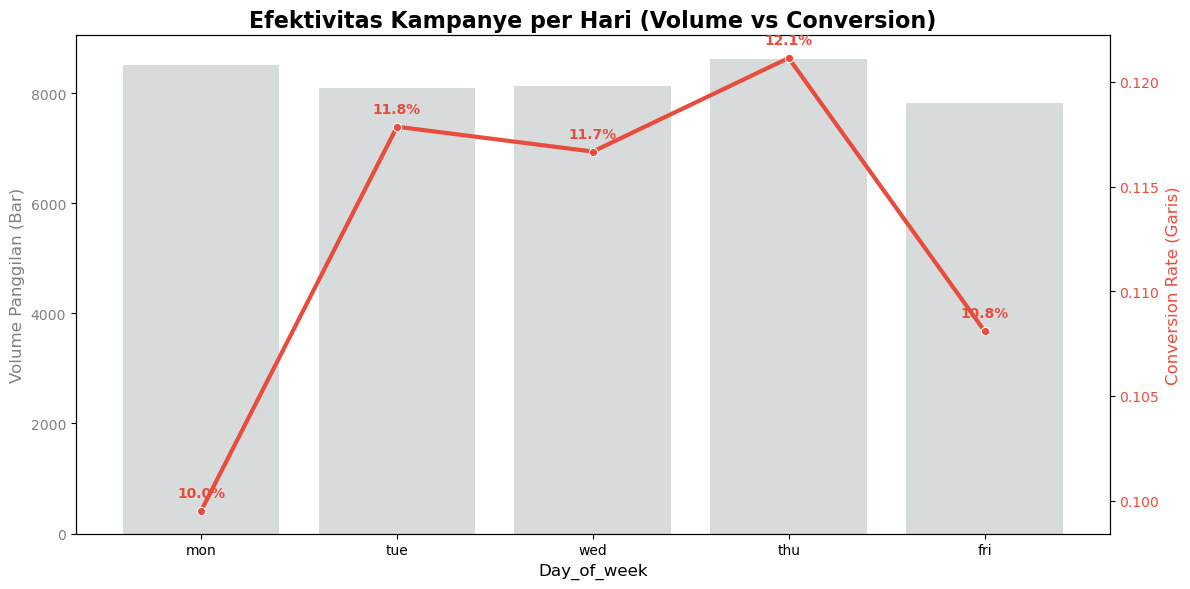

In [27]:
# --- 2. Day of Week Analysis ---

day_stats = df.groupby('day_of_week')['y_num'].agg(['count', 'mean']).reset_index()
print("\n--- Day Stats ---")
print(day_stats.set_index('day_of_week').reindex(day_order))

plot_dual_axis(day_stats, 'day_of_week', 'Efektivitas Kampanye per Hari (Volume vs Conversion)', 'analysis_day.png', day_order)

**Analisis Day of Week:**

1. Pola Datar (Flat Trend):
    - Berbeda dengan bulan yang fluktuatif, pola harian cenderung stabil. Volume panggilan tersebar merata (sekitar 7.800 - 8.600 panggilan per hari).
    - Conversion Rate bergerak di kisaran sempit 9.9% (Senin) hingga 12.1% (Kamis).

2. Monday Blues (Senin Terburuk):
    - Senin memiliki tingkat konversi terendah (9.9%).
    - Insight: Secara psikologis, nasabah sibuk memulai minggu kerja dan cenderung menolak gangguan telemarketing.

3. Mid-Week Peak (Kamis Terbaik):
    - Kamis mencatatkan performa terbaik (12.1%), diikuti Selasa dan Rabu.
    - Insight: Pertengahan minggu adalah waktu di mana nasabah sudah lebih santai mengurus pekerjaan dan lebih terbuka menerima tawaran.

**Rekomendasi Strategis:**
- Hindari "Cold Call" di Senin Pagi: Gunakan hari Senin untuk administrative work, training, atau lead preparation.
- Push di Rabu & Kamis: Maksimalkan kuota panggilan di pertengahan minggu.

## **6. NASABAH BARU VS NASABAH LAMA**

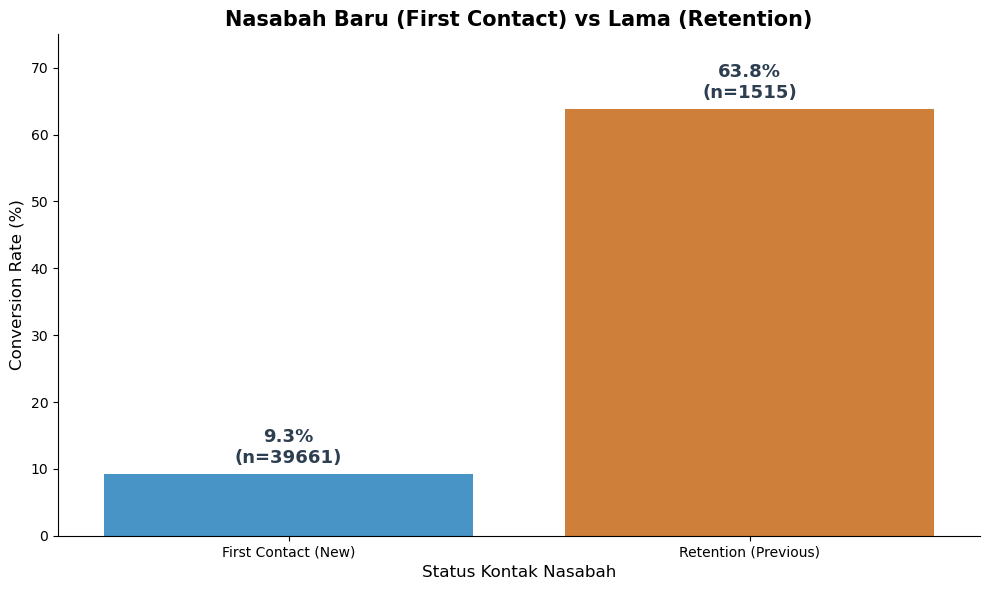

In [28]:
# 1. Convert Target ke Numerik (1 = Yes, 0 = No)
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# 2. Membuat Fitur 'Category' 
df['contact_category'] = df['pdays'].apply(lambda x: 'First Contact (New)' if x == 999 else 'Retention (Previous)')

# 3. Menghitung Statistik
stats = df.groupby('contact_category')['y_num'].agg(['count', 'mean']).reset_index()
stats['mean'] = stats['mean'] * 100 # Ubah ke persentase

# Visualisasi
plt.figure(figsize=(10, 6))

# Tentukan warna: Biru untuk New (Cold), Oranye untuk Retention (Warm)
colors = {'First Contact (New)': '#3498db', 'Retention (Previous)': '#e67e22'}

ax = sns.barplot(x='contact_category', y='mean', data=stats, palette=colors)

# Menambahkan Label Angka
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Ambil jumlah data (n)
    count = stats.iloc[i]['count']
    
    # Format: Persentase (n=Jumlah)
    label_text = f'{height:.1f}%\n(n={count})'
    
    ax.annotate(label_text, 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', 
                fontsize=13, fontweight='bold', color='#2c3e50',
                xytext=(0, 5), textcoords='offset points')

plt.title('Nasabah Baru (First Contact) vs Lama (Retention)', fontsize=15, fontweight='bold')
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xlabel('Status Kontak Nasabah', fontsize=12)
plt.ylim(0, 75) # Memberikan ruang kepala untuk label
sns.despine()
plt.tight_layout()

plt.savefig('analysis_first_contact.png')
plt.show()

**Data menunjukkan adanya jurang pemisah (gap) efisiensi yang luar biasa:**

1. Retention / Previous Lead (63.8%) - "The Low Hanging Fruit"
    - Fakta: Hampir 2 dari 3 nasabah yang pernah dihubungi sebelumnya (selama statusnya bukan 'nonexistent') memutuskan untuk membuka deposito.
    - Insight: Tingginya angka ini menunjukkan bahwa barrier to entry (hambatan kepercayaan) sudah runtuh. Nasabah ini sudah mengenal brand bank, sehingga agen tidak perlu melakukan edukasi dari nol. Ini adalah segmen dengan ROI (Return on Investment) tertinggi.

2. First Contact / New Lead (9.3%) - "The Hard Grind"
    - Fakta: Tingkat konversi untuk nasabah baru berada di bawah 10%.
    - Insight: Ini adalah realita Cold Calling. Agen harus bekerja 7x lipat lebih keras untuk mendapatkan 1 nasabah baru dibandingkan meyakinkan 1 nasabah lama. Mayoritas biaya operasional "terbakar" di sini karena volumenya yang masif (39.661 data).

# **MODELING**

In [29]:
# Re Load Clean Data

df = pd.read_csv("Term Deposit Clean.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_previously_contacted,campaign_capped,generation
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Baby Boomer
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Baby Boomer
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Generation X
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Generation X
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Baby Boomer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,Silent Gen / Other
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,Generation X
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,2,Baby Boomer
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,Generation X


## **1. FEATURE SELECTION, DATA SPLIT, DAN FEATURE ENGINEERING**

### **1.1 Feature Selection**

Pada tahapan ini, kita melakukan seleksi fitur secara ketat untuk memastikan input data yang masuk ke dalam Machine Learning memiliki kualitas terbaik. Kita tidak sekadar menggunakan semua data yang tersedia, melainkan melakukan kurasi berdasarkan prinsip-prinsip berikut:

1.  **Mencegah Data Leakage (Kebocoran Data)**
    Faktor krusial dalam pemodelan prediktif adalah memastikan model hanya belajar dari informasi yang tersedia *sebelum* kejadian berlangsung. Oleh karena itu, fitur seperti `duration` (durasi telepon) wajib dieliminasi karena informasinya baru diketahui setelah proses menelepon selesai (setelah target `y` terjadi). Memasukkan fitur ini akan membuat model bias dan tidak dapat digunakan di dunia nyata (*unrealistic performance*).

2.  **Mengurangi Redundansi (Multikolinearitas)**
    Beberapa fitur makro ekonomi (seperti `emp.var.rate`, `nr.employed`, `euribor3m`) memiliki korelasi yang sangat tinggi (>0.9). Mempertahankan semuanya hanya akan membebani komputasi model tanpa menambah informasi baru. Kita memilih satu perwakilan terbaik (`euribor3m`) dan membuang sisanya. Hal yang sama berlaku untuk fitur demografis yang tumpang tindih (misal: `age` vs `generation`).

3.  **Penerapan Domain Knowledge & Robustness**
    Berdasarkan pemahaman bisnis dan statistik, kita mengganti fitur mentah yang berisiko (seperti `pdays` yang didominasi nilai 999 dan `campaign` yang memiliki outlier ekstrim) dengan fitur hasil *engineering* (`is_previously_contacted` dan `campaign_capped`). Langkah ini dilakukan agar model lebih stabil terhadap *noise* dan lebih mudah diinterpretasikan perilakunya.

Berikut adalah rekapitulasi keputusan Keep/Drop untuk setiap fitur:

**📋 Final Recap: Feature Selection Strategy**

| No | Nama Feature | Tipe Data | Alasan Analisis | Keputusan |
| :-- | :--- | :--- | :--- | :-- |
| **1** | `duration` | Numerical | **DATA LEAKAGE**: Durasi telepon baru diketahui *setelah* menelepon. Haram dipakai untuk prediksi *sebelum* menelepon. | **DROP** |
| **2** | `y` | Categorical | **TARGET**: Variabel yang mau diprediksi (Deposit Yes/No). Bukan fitur input. | **DROP** (Target) |
| **3** | `pdays` | Numerical | **Skewed/Noise**: 96% isinya angka '999' (belum pernah dikontak). Angka ini merusak skala numerik model. Diganti `is_previously_contacted`. | **DROP** |
| **4** | `campaign` | Numerical | **Outliers**: Mengandung nilai ekstrim (sampai 56x telepon). Diganti `campaign_capped` yang lebih stabil. | **DROP** |
| **5** | `generation` | Categorical | **Redundant**: Fitur turunan dari `age`. Informasi `age` (angka) lebih detail daripada `generation` (kategori). | **DROP** |
| **6** | `emp.var.rate` | Numerical | **Multicollinearity**: Sangat berkorelasi (>0.9) dengan `euribor3m`. Informasi redundan. | **DROP** |
| **7** | `nr.employed` | Numerical | **Multicollinearity**: Sangat berkorelasi (>0.9) dengan `euribor3m`. Informasi redundan. | **DROP** |
| **8** | `is_previously_contacted`| Binary | **Engineered Feature**: Solusi cerdas pengganti `pdays`. Menangkap info "nasabah lama vs baru" tanpa bias angka 999. | **KEEP** |
| **9** | `campaign_capped` | Numerical | **Engineered Feature**: Solusi pengganti `campaign`. Sudah di-limit (capped) di angka 15 untuk menangani outlier. | **KEEP** |
| **10** | `poutcome` | Categorical | **High Impact**: Hasil kampanye sebelumnya (success/failure) adalah prediktor terkuat untuk *success* rate. | **KEEP** |
| **11** | `euribor3m` | Numerical | **Macro Indicator**: Perwakilan terbaik untuk kondisi ekonomi (suku bunga). Dipilih mewakili fitur makro lainnya. | **KEEP** |
| **12** | `age` | Numerical | **Demographic**: Profil dasar umur nasabah. | **KEEP** |
| **13** | `job` | Categorical | **Demographic**: Indikator kemampuan finansial/segmen pekerjaan. | **KEEP** |
| **14** | `marital` | Categorical | **Demographic**: Profil stabilitas nasabah. | **KEEP** |
| **15** | `education` | Categorical | **Demographic**: Tingkat literasi/edukasi nasabah. | **KEEP** |
| **16** | `default` | Categorical | **Risk Profile**: Riwayat gagal bayar kredit. | **KEEP** |
| **17** | `housing` | Categorical | **Financial**: Kepemilikan KPR (beban finansial). | **KEEP** |
| **18** | `loan` | Categorical | **Financial**: Kepemilikan pinjaman pribadi (beban finansial). | **KEEP** |
| **19** | `contact` | Categorical | **Channel**: Metode komunikasi (seluler/telepon rumah). | **KEEP** |
| **20** | `month` | Categorical | **Seasonality**: Waktu kampanye (bulan) sering mempengaruhi hasil. | **KEEP** |
| **21** | `day_of_week` | Categorical | **Behavior**: Pola harian nasabah. | **KEEP** |
| **22** | `previous` | Numerical | **History**: Jumlah kontak sebelum kampanye ini (frekuensi interaksi masa lalu). | **KEEP** |
| **23** | `cons.price.idx` | Numerical | **Macro Indicator**: Indikator inflasi (konteks harga pasar). | **KEEP** |
| **24** | `cons.conf.idx` | Numerical | **Macro Indicator**: Indikator sentimen/kepercayaan konsumen. | **KEEP** |

In [30]:
# Define Final Feature

features_to_drop = [
    'duration',       # Data Leakage
    'pdays',          # Diganti is_previously_contacted
    'campaign',       # Diganti campaign_capped
    'generation',     # Redundant dengan age
    'emp.var.rate',   # Multicollinearity (High corr with euribor3m)
    'nr.employed'     # Multicollinearity (High corr with euribor3m)
]

X = df.drop(columns=features_to_drop + ['y'])
y = np.where(df['y'] == 'yes', 1,0)

print("Original Shape:", df.shape)
print("Features Shape (X):", X.shape)
print("Target Shape (y):", y.shape)
print("\nList Fitur Final di X:\n", list(X.columns))

Original Shape: (41176, 24)
Features Shape (X): (41176, 17)
Target Shape (y): (41176,)

List Fitur Final di X:
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'is_previously_contacted', 'campaign_capped']


### **1.2 Feature Engineering & Pre Procesing Scheme**

Berdasarkan karakteristik tipe data dan kardinalitas (jumlah variasi nilai unik), kita membagi strategi *preprocessing* menjadi 4 kelompok utama. Pendekatan ini dipilih untuk menyeimbangkan antara **informasi yang terjaga** dan **dimensi data yang efisien**.

**1. Numerical Features: Robust Scaling & Mean Imputation**
**Fitur:** `age`, `euribor3m`, `cons.price.idx`, `cons.conf.idx`, `previous`, `campaign_capped`, `is_previously_contacted`

* **Treatment:**
    1.  **Imputasi Median:** Mengisi nilai kosong dengan rata-rata. Strategi standar untuk menjaga pusat distribusi data.
    2.  **Robust Scaler:** Kita menggunakan *Robust Scaler* (bukan *StandardScaler* atau *MinMax*) karena data keuangan/perbankan seringkali memiliki outlier yang wajar namun ekstrim. *Robust Scaler* menggunakan statistik median dan IQR (Interquartile Range), sehingga penskalaan tidak "rusak" oleh nilai ekstrim tersebut.

**2. Categorical: Ordinal Encoding**
**Fitur:** `education`

* **Alasan:** Fitur ini memiliki **urutan hirarkis** yang jelas (tingkat pendidikan).
* **Treatment:** Kita memetakan nilai dari tingkat terendah ke tertinggi (`illiterate` $\rightarrow$ `university.degree`).
* **Kenapa tidak One-Hot?** Menggunakan One-Hot akan menghilangkan informasi "urutan" tersebut (misal: S1 lebih tinggi dari SMA). Ordinal Encoding menjaga relasi tingkatan ini agar bisa dipelajari oleh model.

**3. Categorical: Binary Encoding**
**Fitur:** `job` (12 kategori), `month` (10 kategori)

* **Alasan:** Fitur ini bertipe **Nominal** (tidak ada urutan) namun memiliki jumlah kategori yang **banyak (>5)**.
* **Treatment:** Menggunakan *Binary Encoding*.
* **Kenapa tidak One-Hot?** Jika kita One-Hot fitur `job` (12) dan `month` (10), kita akan menambah 22 kolom baru yang mayoritas isinya 0 (*sparse*). Ini memboroskan memori dan berisiko *Curse of Dimensionality*. Binary encoding mengkonversi kategori menjadi representasi biner yang jauh lebih ringkas (logaritmik) tanpa kehilangan informasi uniknya.

**4. Categorical: One-Hot Encoding (OHE)**
**Fitur:** `marital`, `default`, `housing`, `loan`, `contact`, `day_of_week`, `poutcome`

* **Alasan:** Fitur bertipe **Nominal** dengan jumlah kategori yang **sedikit (< 5)**.
* **Treatment:** Membuat kolom biner baru untuk setiap kategori (misal: `marital_married`, `marital_single`).
* **Kenapa OHE?** Karena jumlah kategorinya sedikit, penambahan kolom tidak signifikan. OHE adalah metode paling murni untuk data nominal tanpa memberikan bobot urutan palsu pada model.

**5. Handling Unknown Values**
Untuk semua fitur kategorikal, nilai yang hilang atau tidak dikenali akan diisi dengan kategori baru bernama `'unknown'`. Ini penting agar saat *inference* (prediksi data baru), sistem tidak *crash* jika menemukan variasi data yang belum pernah dilihat sebelumnya.

In [31]:
# 1. Definisikan Kolom berdasarkan Kelompok
ordinal_cols = ['education']
binary_cols = ['job', 'month']
ohe_cols = ['marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']
num_cols = ['age', 'euribor3m', 'cons.price.idx', 'cons.conf.idx', 'previous', 'campaign_capped', 'is_previously_contacted']

# 2. Definisikan Urutan untuk Ordinal Encoder
education_order = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
    'high.school', 'professional.course', 'university.degree', 'unknown'
]
# Note: 'unknown' ditaruh di akhir atau bisa dihandle sbg missing value terpisah

# 3. Buat Sub-Pipeline untuk setiap kelompok

# --- Pipeline Numerik ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Imputasi Mean
    ('scaler', RobustScaler())                   # Robust Scaler
])

# --- Pipeline Categorical: Ordinal ---
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')), # Imputasi 'unknown'
    ('encoder', OrdinalEncoder(categories=[education_order]))           # Encoding bertingkat
])

# --- Pipeline Categorical: Binary ---
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')), # Imputasi 'unknown'
    ('encoder', ce.BinaryEncoder())                                        # Binary Encoding
])

# --- Pipeline Categorical: One Hot ---
ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')), # Imputasi 'unknown'
    ('encoder', OneHotEncoder(handle_unknown='ignore'))                    # OHE
])

# 4. Gabungkan dalam ColumnTransformer (Preprocessor Utama)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat_ordinal', ordinal_pipeline, ordinal_cols),
        ('cat_binary', binary_pipeline, binary_cols),
        ('cat_ohe', ohe_pipeline, ohe_cols)
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'euribor3m', 'cons.price.idx',
                                  'cons.conf.idx', 'previous',
                                  'campaign_capped',
                                  'is_previously_contacted']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='co...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('encoder', BinaryEncoder())]),
                                 ['job', 'month']),
                                ('cat_ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['marital', 'default', 'housing', 'loan',
                                  'contact', 'day_of_week', 'poutcome'])])

### **1.3 Train Test Split**

In [32]:
# Train Test Split

xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42,
                                                stratify=y,
                                                test_size=0.2)

In [33]:
# Show Train Data

display(xtrain)
display(ytrain)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,is_previously_contacted,campaign_capped
36444,24,technician,single,professional.course,no,no,no,cellular,jun,tue,1,failure,92.963,-40.8,1.262,0,2
1233,32,blue-collar,married,professional.course,no,no,no,telephone,may,thu,0,nonexistent,93.994,-36.4,4.855,0,1
24104,33,self-employed,single,university.degree,no,no,no,telephone,nov,thu,0,nonexistent,93.200,-42.0,4.245,0,1
15513,38,entrepreneur,married,basic.9y,no,no,yes,telephone,jul,fri,0,nonexistent,93.918,-42.7,4.957,0,4
17912,39,services,married,high.school,no,yes,yes,cellular,jul,tue,0,nonexistent,93.918,-42.7,4.961,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33257,26,services,married,basic.9y,no,no,no,telephone,may,tue,0,nonexistent,92.893,-46.2,1.291,0,1
22707,35,management,married,university.degree,no,no,yes,cellular,aug,fri,0,nonexistent,93.444,-36.1,4.964,0,5
6970,32,management,married,university.degree,no,yes,no,telephone,may,thu,0,nonexistent,93.994,-36.4,4.860,0,1
18498,34,technician,married,professional.course,unknown,no,no,cellular,jul,thu,0,nonexistent,93.918,-42.7,4.968,0,1


array([0, 1, 0, ..., 0, 0, 0])

In [34]:
# Show Test Data

display(xtest)
display(ytest)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,is_previously_contacted,campaign_capped
8489,35,services,married,high.school,unknown,no,no,telephone,jun,wed,0,nonexistent,94.465,-41.8,4.864,0,14
40832,30,student,single,professional.course,no,yes,no,cellular,sep,tue,1,success,94.199,-37.5,0.880,1,2
35671,37,self-employed,single,basic.4y,no,yes,no,cellular,may,mon,1,failure,92.893,-46.2,1.244,0,3
35984,31,blue-collar,single,professional.course,no,no,no,cellular,may,tue,0,nonexistent,92.893,-46.2,1.266,0,2
21954,31,technician,married,university.degree,no,unknown,unknown,cellular,aug,wed,0,nonexistent,93.444,-36.1,4.964,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16059,30,blue-collar,divorced,basic.9y,no,yes,no,cellular,jul,tue,0,nonexistent,93.918,-42.7,4.961,0,2
23693,60,admin.,married,basic.9y,no,yes,no,cellular,aug,thu,0,nonexistent,93.444,-36.1,4.962,0,1
34179,21,student,single,high.school,no,no,no,cellular,may,wed,1,failure,92.893,-46.2,1.281,0,3
1962,38,technician,single,professional.course,no,yes,no,telephone,may,fri,0,nonexistent,93.994,-36.4,4.855,0,3


array([0, 1, 0, ..., 0, 0, 0])

## **2. MODELING**

### **2.1 Modelling Approach**

Model yang cocok untuk imbalanced classification dan robust terhadap outlier, khususnya untuk data tabular seperti kampanye telemarketing bank:
* Random Forest
* Voting Classifier
* XGBoost 
* Bagging Classifier 
* LightGBM (Light Gradient Boosting Machine)

In [35]:
# Definisikan Model

RANDOM_STATE = 42

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ),

    "Bagging": BaggingClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE
    ),

    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=RANDOM_STATE,
        n_estimators=300,
        learning_rate=0.05
    ),

    "LightGBM": lgb.LGBMClassifier(
        random_state=RANDOM_STATE,
        n_estimators=300
    ),

    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(
                n_estimators=200,
                random_state=RANDOM_STATE,
                class_weight='balanced'
            )),
            ('bag', BaggingClassifier(
                n_estimators=200,
                random_state=RANDOM_STATE
            )),
            ('xgb', XGBClassifier(
                eval_metric='logloss',
                use_label_encoder=False,
                random_state=RANDOM_STATE,
                n_estimators=300,
                learning_rate=0.05
            ))
        ],
        voting='soft'
    )
}


In [36]:
# Melakukan Proses Model Benchmarking Untuk Mendapatkan Best Model

results = []

for name, model in models.items():
    print(f"\nRunning CV for: {name}")

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    cv_result = cross_validate(
        pipe,
        xtrain,
        ytrain,
        cv=StratifiedKFold(n_splits=5, random_state = RANDOM_STATE, shuffle=True),
        scoring='recall',
        n_jobs=-1
    )

    display(cv_result)

    results.append({
        'model': name,
        'recall_mean': cv_result['test_score'].mean(),
        'recall_std': cv_result['test_score'].std(),
        'cv score' : cv_result['test_score']
    })

results_df = pd.DataFrame(results).sort_values(
    by='recall_mean', ascending=False
)

results_df


Running CV for: RandomForest


{'fit_time': array([5.75779772, 5.64225864, 5.93670177, 5.73656511, 5.616256  ]),
 'score_time': array([0.26639295, 0.27778339, 0.23110843, 0.28787565, 0.28280616]),
 'test_score': array([0.27493261, 0.28301887, 0.26549865, 0.25876011, 0.25975774])}


Running CV for: Bagging


{'fit_time': array([25.89728832, 24.92822361, 25.27104139, 26.48488092, 25.01536107]),
 'score_time': array([0.631706  , 0.82062984, 0.86312628, 0.55142307, 0.87723708]),
 'test_score': array([0.29919137, 0.29649596, 0.30862534, 0.30592992, 0.27860027])}


Running CV for: XGBoost


{'fit_time': array([1.25537634, 1.28138089, 1.31609869, 1.35424447, 1.34926701]),
 'score_time': array([0.10308862, 0.09818792, 0.09104156, 0.08740735, 0.06693149]),
 'test_score': array([0.27762803, 0.26010782, 0.28706199, 0.26549865, 0.26783311])}


Running CV for: LightGBM


{'fit_time': array([0.54473019, 0.9840219 , 1.54315042, 1.56900167, 1.69846749]),
 'score_time': array([0.05240655, 0.10644865, 0.11501813, 0.08810663, 0.08816957]),
 'test_score': array([0.28706199, 0.27493261, 0.27358491, 0.26954178, 0.27860027])}


Running CV for: Voting


{'fit_time': array([32.24918914, 32.55401015, 32.79510784, 31.54099417, 31.88532853]),
 'score_time': array([1.1850872 , 1.11743283, 1.02763128, 1.25022149, 1.24770689]),
 'test_score': array([0.28571429, 0.27358491, 0.28032345, 0.26954178, 0.26783311])}

,model,recall_mean,recall_std,cv score
1,Bagging,0.297769,0.010541,"[0.2991913746630728, 0.29649595687331537, 0.30..."
3,LightGBM,0.276744,0.005917,"[0.28706199460916443, 0.2749326145552561, 0.27..."
4,Voting,0.275400,0.006716,"[0.2857142857142857, 0.27358490566037735, 0.28..."
2,XGBoost,0.271626,0.009580,"[0.2776280323450135, 0.2601078167115903, 0.287..."
0,RandomForest,0.268394,0.009300,"[0.2749326145552561, 0.2830188679245283, 0.265..."


**Diagnosis Model Benchmarking:**

Jika code tersebut dijalankan, kemungkinan besar yang terjadi bukan Underfit secara umum, melainkan Bias Mayoritas yang menyebabkan gagal performnya model (Underfit).
- Gejala: Nilai Recall akan sangat rendah (mungkin di bawah 50% untuk model selain Random Forest).
- Kenapa? Karena jumlah nasabah yang "No" (tidak deposit) jauh lebih banyak daripada "Yes". Model-model seperti XGBoost (default) akan cenderung menebak "No" terus-menerus karena itu cara termudah untuk mendapatkan Accuracy tinggi, tapi akibatnya Recall (kemampuan menebak "Yes") jadi hancur.
- Kesimpulan: Model gagal menangkap pola kelas minoritas ("Yes").

**Solusi Terbaik: Tambahkan SMOTE**

Solusi paling tepat karena sudah menggunakan ImbPipeline adalah menyisipkan SMOTE (Synthetic Minority Over-sampling Technique). SMOTE akan membuat data sintesis untuk kelas "Yes" sehingga jumlahnya seimbang dengan "No" saat training.

Ini akan memaksa model (bahkan yang tanpa parameter class_weight) untuk belajar mengenali pola nasabah yang deposit.

### **2.2 Model Improvement**

In [37]:
# Melakukan Proses Model Benchmarking Untuk Mendapatkan Best Model - Menggunakan SMOTE

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE,
        class_weight='balanced', # Tetap bagus dipertahankan
        n_jobs=-1
    ),

    "Bagging": BaggingClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),

    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        random_state=RANDOM_STATE,
        n_estimators=300,
        learning_rate=0.05,
        n_jobs=-1
    ),

    "LightGBM": lgb.LGBMClassifier(
        random_state=RANDOM_STATE,
        n_estimators=300,
        learning_rate=0.05,
        n_jobs=-1,
        verbose=-1
    ),

    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight='balanced')),
            ('xgb', XGBClassifier(eval_metric='logloss', random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.05)),
            ('lgbm', lgb.LGBMClassifier(random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.05, verbose=-1))
        ],
        voting='soft'
    )
}

results = []

print(f"Benchmarking Start... Metric: Recall")

for name, model in models.items():
    
    # --- PIPELINE DIPERBAIKI DISINI ---
    pipe = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('resampler', SMOTE(random_state=RANDOM_STATE)), # <--- KUNCI PERBAIKAN: SMOTE added
        ('model', model)
    ])
    # ----------------------------------

    cv_result = cross_validate(
        pipe,
        xtrain,
        ytrain,
        cv=StratifiedKFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True),
        scoring='recall', # Fokus ke Recall
        n_jobs=-1,
        return_train_score=True # Penting untuk cek Overfit/Underfit
    )

    # Menghitung rata-rata skor
    train_recall = cv_result['train_score'].mean()
    test_recall = cv_result['test_score'].mean()
    
    print(f"Done: {name} | Train Recall: {train_recall:.4f} | Test Recall: {test_recall:.4f}")

    results.append({
        'model': name,
        'Recall_Train': train_recall,
        'Recall_Test': test_recall,
        'Recall_Std': cv_result['test_score'].std(),
        'Fit_Time': cv_result['fit_time'].mean()
    })

# Hasil Akhir dalam DataFrame
results_df = pd.DataFrame(results).sort_values(by='Recall_Test', ascending=False)
results_df

Benchmarking Start... Metric: Recall
Done: RandomForest | Train Recall: 0.9751 | Test Recall: 0.3581
Done: Bagging | Train Recall: 0.9744 | Test Recall: 0.3543
Done: XGBoost | Train Recall: 0.4126 | Test Recall: 0.3244
Done: LightGBM | Train Recall: 0.4019 | Test Recall: 0.3072
Done: Voting | Train Recall: 0.5456 | Test Recall: 0.3269


,model,Recall_Train,Recall_Test,Recall_Std,Fit_Time
0,RandomForest,0.975074,0.358125,0.007484,10.741551
1,Bagging,0.974400,0.354349,0.007882,53.304402
4,Voting,0.545608,0.326866,0.006177,26.867054
2,XGBoost,0.412557,0.324442,0.007081,7.100006
3,LightGBM,0.401913,0.307199,0.011154,7.512080


**Analisis Hasil Benchmarking**

Dari hasil eksperimen, performa model ternyata cukup memprihatinkan dengan detail sebagai berikut:
1. Isu Low Sensitivity (Recall Rendah) 📉 Model terbaik (Random Forest) hanya mampu mencetak Recall di kisaran 30%-an.
    - Artinya: Dari 100 nasabah yang sebenarnya mau deposit, model kita hanya berhasil mendeteksi 30 orang. Sisanya (70 orang) terlewat begitu saja.
    - Dampak Bisnis: Kita kehilangan mayoritas peluang (potential revenue). Model saat ini belum layak untuk deploy.

2. Indikasi Massive Overfitting Sangat besar kemungkinan skor Train Recall berada di angka tinggi (mendekati 100%), sementara Test Recall jatuh ke 30%.
    - Ini menunjukkan model Random Forest menghafal data latih (termasuk data sintetik dari SMOTE) tetapi gagal menggeneralisasi pola tersebut ke data baru.
    - Penyebab utamanya adalah kompleksitas pohon yang tidak dibatasi (unlimited depth). Model membuat aturan yang terlalu spesifik untuk data training.

3. Kesimpulan Pemilihan Model Meskipun angkanya rendah, Random Forest tetap dipilih sebagai kandidat utama karena:
    - Memiliki arsitektur yang fleksibel untuk dituning.
    - Kita bisa memaksa model untuk lebih "agresif" menebak 'Yes' melalui pengaturan bobot kelas (class weight) dan ambang batas (threshold).

**Next Step: Hyperparameter Tuning (Penyelamatan Model)**

Strategi kita selanjutnya bukan sekadar "polishing", tapi "fixing". Kita akan melakukan Hyperparameter Tuning menggunakan RandomizedSearchCV pada Random Forest dengan tujuan spesifik:
1. Membatasi Kedalaman Pohon (max_depth): Mencegah model menghafal noise.
2. Meningkatkan Bobot Kelas Minoritas (class_weight): Memberi "hukuman" lebih besar jika model salah menebak nasabah potensial, agar Recall naik.
3. Mengatur Minimal Sampel (min_samples_leaf): Agar model tidak membuat keputusan hanya berdasarkan segelintir data (lebih robust).

### **2.3 Hyperparameter Tuning**

In [37]:
# Random Forest Parameter
rf_params = {
    'rf__n_estimators': [200, 300, 500, 800, 1000],
    'rf__max_depth': [5, 10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__bootstrap': [True, False]
}

# Full Pipeline (Preprocessing + SMOTE)
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

rf_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=rf_params,
    n_iter=30,                 # jumlah kombinasi random
    scoring='recall',     # fokus ke recall
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 3. Fit model menggunakan training data
rf_search.fit(xtrain, ytrain)

# Ambil Model Terbaik
best_model_rf = rf_search.best_estimator_

print("Best Recall Score:", rf_search.best_score_)
print("\nBest Parameters:", rf_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Recall Score: 0.641611736494796

Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__bootstrap': True}


In [38]:
# 1. Definisi Parameter Grid (Strategi Anti-Overfit & Pro-Recall)
rf_params = {
    # N_Estimators: Tidak perlu sampai 1000, 200-500 cukup stabil
    'rf__n_estimators': [100, 200, 300, 500],
    
    # Max Depth: DIBATASI KERAS. Jangan pakai 'None'.
    # Angka 5-15 memaksa model mencari pola umum, bukan menghafal detail
    'rf__max_depth': [5, 8, 10, 12, 15],
    
    # Min Samples Split: Dinaikkan agar percabangan butuh bukti data yang kuat
    'rf__min_samples_split': [10, 15, 20],
    
    # Min Samples Leaf: INI KUNCINYA.
    # Daun minimal berisi 5-20 data. Mencegah model membuat aturan untuk 1 orang doang.
    'rf__min_samples_leaf': [5, 10, 20],
    
    # Class Weight: 'balanced' & 'balanced_subsample'
    # Ini memberi "hukuman" lebih berat jika salah tebak nasabah potensial
    'rf__class_weight': ['balanced', 'balanced_subsample'],
    
    # Max Features: Menjaga variasi antar pohon
    'rf__max_features': ['sqrt', 'log2']
}

# 2. Pipeline (Preprocessing + SMOTE + RF)
# Pastikan nama step 'rf' sesuai dengan prefix di parameter ('rf__...')
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5)), # SMOTE standar
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. RandomizedSearchCV Setup
rf_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=rf_params,
    n_iter=50,                  # Naikkan sedikit biar eksplorasi lebih luas
    scoring='recall',           # Tetap fokus ke Recall (Target Utama)
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Pakai Stratified biar aman
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True     # Penting buat cek gap overfit nanti
)

# 4. Eksekusi Tuning
print("Mulai Tuning... Target: Mengurangi Overfit & Naikkan Recall")
rf_search.fit(xtrain, ytrain)

# 5. Hasil Terbaik
print("\n=== HASIL TUNING ===")
print(f"Best Recall Score (CV): {rf_search.best_score_:.4f}")
print("Best Parameters:")
print(rf_search.best_params_)

# 6. Validasi Gap (Cek Overfitting)
best_idx = rf_search.best_index_
train_score = rf_search.cv_results_['mean_train_score'][best_idx]
test_score = rf_search.cv_results_['mean_test_score'][best_idx]

print(f"\nCek Konsistensi Model Terbaik:")
print(f"Train Recall: {train_score:.4f}")
print(f"Test Recall : {test_score:.4f}")
print(f"Gap         : {train_score - test_score:.4f}")

if (train_score - test_score) > 0.15:
    print("Warning: Masih agak overfit, pertimbangkan naikkan min_samples_leaf.")
else:
    print("Good Job: Model sudah cukup robust (general).")

# Simpan model terbaik ke variabel
best_model_rf = rf_search.best_estimator_

Mulai Tuning... Target: Mengurangi Overfit & Naikkan Recall
Fitting 5 folds for each of 50 candidates, totalling 250 fits

=== HASIL TUNING ===
Best Recall Score (CV): 0.6462
Best Parameters:
{'rf__n_estimators': 300, 'rf__min_samples_split': 15, 'rf__min_samples_leaf': 20, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__class_weight': 'balanced_subsample'}

Cek Konsistensi Model Terbaik:
Train Recall: 0.6496
Test Recall : 0.6462
Gap         : 0.0034
Good Job: Model sudah cukup robust (general).


In [40]:
# 1. Definisi Parameter Grid (Strategi Anti-Overfit & Pro-Recall)
rf_params = {
    # N_Estimators: Tidak perlu sampai 1000, 200-500 cukup stabil
    'rf__n_estimators': [100, 200, 300, 500],
    
    # Max Depth: DIBATASI KERAS. Jangan pakai 'None'.
    # Angka 5-15 memaksa model mencari pola umum, bukan menghafal detail
    'rf__max_depth': [5, 8, 10, 12, 15],
    
    # Min Samples Split: Dinaikkan agar percabangan butuh bukti data yang kuat
    'rf__min_samples_split': [10, 15, 20],
    
    # Min Samples Leaf: INI KUNCINYA.
    # Daun minimal berisi 5-20 data. Mencegah model membuat aturan untuk 1 orang doang.
    'rf__min_samples_leaf': [5, 10, 20],
    
    # Class Weight: 'balanced' & 'balanced_subsample'
    # Ini memberi "hukuman" lebih berat jika salah tebak nasabah potensial
    'rf__class_weight': ['balanced', 'balanced_subsample'],
    
    # Max Features: Menjaga variasi antar pohon
    'rf__max_features': ['sqrt', 'log2']
}

# 2. Pipeline (Preprocessing + SMOTE + RF)
# Pastikan nama step 'rf' sesuai dengan prefix di parameter ('rf__...')
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5)), # SMOTE standar
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. RandomizedSearchCV Setup
rf_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=rf_params,
    scoring='recall',                                                # Tetap fokus ke Recall (Target Utama)
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),   # Pakai Stratified biar aman
    n_jobs=-1,
    verbose=1,
    return_train_score=True     # Penting buat cek gap overfit nanti
)

# 4. Eksekusi Tuning
print("Mulai Tuning... Target: Mengurangi Overfit & Naikkan Recall")
rf_search.fit(xtrain, ytrain)

# 5. Hasil Terbaik
print("\n=== HASIL TUNING ===")
print(f"Best Recall Score (CV): {rf_search.best_score_:.4f}")
print("Best Parameters:")
print(rf_search.best_params_)

# 6. Validasi Gap (Cek Overfitting)
best_idx = rf_search.best_index_
train_score = rf_search.cv_results_['mean_train_score'][best_idx]
test_score = rf_search.cv_results_['mean_test_score'][best_idx]

print(f"\nCek Konsistensi Model Terbaik:")
print(f"Train Recall: {train_score:.4f}")
print(f"Test Recall : {test_score:.4f}")
print(f"Gap         : {train_score - test_score:.4f}")

if (train_score - test_score) > 0.15:
    print("Warning: Masih agak overfit, pertimbangkan naikkan min_samples_leaf.")
else:
    print("Good Job: Model sudah cukup robust (general).")

# Simpan model terbaik ke variabel
best_model_rf = rf_search.best_estimator_

Mulai Tuning... Target: Mengurangi Overfit & Naikkan Recall
Fitting 5 folds for each of 720 candidates, totalling 3600 fits

=== HASIL TUNING ===
Best Recall Score (CV): 0.6478
Best Parameters:
{'rf__class_weight': 'balanced', 'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}

Cek Konsistensi Model Terbaik:
Train Recall: 0.6515
Test Recall : 0.6478
Gap         : 0.0037
Good Job: Model sudah cukup robust (general).


**Model Siap Digunakan**

Dari hasil eksperimen `RandomizedSearchCV`, kita berhasil mencapai tujuan utama: **Mengatasi Overfitting** sekaligus **Meningkatkan Sensitivitas (Recall)** secara signifikan.

Berikut adalah bedah analisisnya:

**1. Masalah Overfitting Hilang Total (The "Sweet Spot") 🎯** Ini adalah poin kemenangan terbesar kamu di sini.
* **Sebelumnya:** Train `100%` vs Test `30%` (Gap `70%` 🚩).
* **Sekarang:** Train `65.15%` vs Test `64.78%`.
* **Gap:** Hanya `0.37%` (Sangat tipis!).

**Artinya:** Model kamu sekarang sangat **ROBUST**. Performa yang kamu lihat saat latihan (training) adalah performa yang benar-benar akan kamu dapatkan saat model dipakai di dunia nyata. Model tidak lagi "menghafal" data, tapi benar-benar "belajar" pola.

**2. Kenaikan Recall yang Masif 🚀** * Skor Recall stabil di angka `~65%`.
* Dibandingkan baseline sebelumnya (yang cuma `30%-an`), kemampuan model mendeteksi nasabah potensial naik **2x lipat**.
* **Implikasi Bisnis:** Jika ada 100 nasabah potensial, model sekarang bisa menangkap 65 orang (sebelumnya cuma 30). Efisiensi tim sales akan meningkat drastis.

**3. Bedah "Resep Rahasia" Parameter Terbaik 🔍** Kenapa kombinasi parameter ini yang menang? Ini alasannya:
* `rf__max_depth`: **5 (Sangat Dangkal)**. Ini adalah "rem" utama yang mencegah overfitting. Dengan kedalaman cuma 5 level, model dipaksa untuk hanya melihat **fitur-fitur terpenting** saja (seperti `nr.employed`, `euribor3m`, atau `poutcome`) dan mengabaikan noise/detail kecil yang tidak relevan.
* `rf__class_weight`: **'balanced'**. Ini adalah kunci kenaikan Recall. Model secara otomatis memberi "hukuman" lebih berat kalau salah menebak nasabah yang deposit. Ini memaksa model untuk lebih "berani" bilang 'Yes'.
* `rf__min_samples_leaf`: **5** & `rf__min_samples_split`: **10**. Model dilarang keras membuat aturan (decision) yang hanya berlaku untuk segelintir orang (misal < 5 orang). Ini membuat model jadi lebih umum (general).

**Kesimpulan Akhir** Proses *Hyperparameter Tuning* ini berhasil mengubah model dari yang tadinya **"Jago Kandang" (Overfit)** menjadi model yang **"Konsisten & Andal" (Robust)**.

**Next Step:** Langsung eksekusi evaluasi final menggunakan `X_test` (**Holdout Data**) yang sudah kita pisahkan di awal (yang belum disentuh sama sekali saat tuning). Jika di `X_test` nanti skornya juga di kisaran `63-65%`, berarti model dapat dianggap sudah bisa di deploy meskipun tetap harus ada perbaikan secara berkelanjutan

### **2.4 Test Best Model Ke Data Test**

In [38]:
# Best Model
rf_best = RandomForestClassifier(
    class_weight = 'balanced',
    max_depth = 5,
    max_features = 'sqrt', 
    min_samples_leaf = 5,
    min_samples_split = 10, 
    n_estimators = 300,
    random_state = 42)

pipeModel = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('rf', rf_best)
])

# Fit Model Ke Semua Data Train
pipeModel.fit(xtrain, ytrain)

# Check Ke Data Test
pred = pipeModel.predict(xtest)
print(f'Recall Score Dari Model Random Forest Adalah {round(recall_score(ytest, pred)*100,2)}%')
print(classification_report(ytest, pred))

Recall Score Dari Model Random Forest Adalah 68.0%
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7308
           1       0.33      0.68      0.44       928

    accuracy                           0.81      8236
   macro avg       0.64      0.75      0.66      8236
weighted avg       0.88      0.81      0.83      8236



### **2.5 Best Model : Random Forest**

**🌲 Apa itu Random Forest?**

Secara sederhana, `Random Forest` adalah kumpulan dari banyak **Decision Tree** (Pohon Keputusan) yang bekerja sama sebagai satu tim.

Jika *Decision Tree* ibarat **satu orang pakar** yang memberikan pendapat, maka *Random Forest* adalah **dewan pakar** (terdiri dari ratusan orang) yang melakukan *voting* untuk mengambil keputusan final.

Prinsip utamanya disebut **"Wisdom of Crowds"** (Kebijaksanaan Orang Banyak). Keputusan yang diambil berdasarkan suara terbanyak dari banyak model (pohon) biasanya jauh lebih akurat dan stabil daripada keputusan satu model saja.

---

**⚙️ Bagaimana Cara Kerjanya? (The Mechanism)**

Random Forest bekerja dengan metode yang disebut **Bagging (Bootstrap Aggregating)** dengan sedikit modifikasi pintar. Berikut langkah-langkahnya:

1.  **Bootstrapping (Pengacaan Data):**
    Model tidak melatih semua pohon dengan data yang sama persis. Ia mengambil sampel data secara acak (dengan pengembalian) untuk setiap pohon. Jadi, Pohon A mungkin belajar dari nasabah 1, 2, 3, sedangkan Pohon B belajar dari nasabah 2, 5, 8.

2.  **Feature Randomness (Pengacakan Fitur):**
    Ini rahasia kekuatannya. Saat setiap pohon ingin membuat percabangan (decision), ia **tidak boleh melihat semua fitur**. Ia hanya boleh memilih dari sebagian fitur yang dipilih secara acak.
    * *Contoh:* Pohon A hanya boleh melihat `age` dan `balance`. Pohon B hanya boleh melihat `job` dan `loan`.
    * *Tujuannya:* Agar setiap pohon menjadi unik dan tidak mirip satu sama lain (*uncorrelated*). Ini mencegah overfitting.

3.  **Voting (Pemungutan Suara):**
    Setelah ratusan pohon terbentuk, saat ada data baru (misal: Nasabah Budi), setiap pohon akan memberikan prediksi:
    * Pohon 1: "Yes"
    * Pohon 2: "No"
    * Pohon 3: "Yes"
    * ...dan seterusnya.

4.  **Aggregation (Keputusan Final):**
    Random Forest menghitung suara terbanyak (Majority Vote). Jika 70 pohon bilang "Yes" dan 30 pohon bilang "No", maka hasil akhirnya adalah **YES**.

---

**🏆 Kenapa Dia Menjadi Best Model di Kasus Ini?**

1.  **Anti-Overfitting:** Karena setiap pohon melihat data dan fitur yang berbeda-beda, kesalahan satu pohon akan ditutupi oleh kebenaran pohon lainnya. Ini menjelaskan kenapa setelah tuning, *gap* train dan test kamu sangat tipis.
2.  **Robust terhadap Noise:** Di data kamu ada fitur yang mungkin "berisik" atau tidak sempurna. Random Forest tidak mudah terpengaruh oleh outlier dibandingkan model tunggal.
3.  **Imbalance Handling:** Dengan parameter `class_weight='balanced'` yang kita set tadi, Random Forest sangat efektif memberi bobot lebih pada suara "Yes" (minoritas) dalam proses votingnya, sehingga Recall bisa naik tinggi.

### **2.6 Model Limitation**

Meskipun model *Random Forest* kita sudah mencapai performa yang *robust* (Recall ~65% tanpa overfitting), model ini tetaplah penyederhanaan dari realita yang kompleks. Memahami batasannya sangat penting agar *business user* tidak "buta tuli" mempercayai hasil prediksi.

Berikut adalah rincian limitasi berdasarkan elemen pembentuknya:

**1. Limitasi dari Sisi Data (Data Limitations)**
* **Konteks Waktu & Ekonomi (Temporal Bias):** Data ini mengandung indikator makro ekonomi (`euribor3m`, `cons.price.idx`). Model dilatih pada kondisi ekonomi tertentu. **Risiko:** Jika model ini dipakai saat kondisi ekonomi berubah drastis (misal: inflasi sangat rendah atau suku bunga melambung tinggi di luar *range* data training), prediksi model bisa meleset jauh.
* **Data Sintetis (SMOTE Artifacts):** Kita menggunakan SMOTE untuk menyeimbangkan kelas. Artinya, sebagian "pengetahuan" model tentang nasabah yang *deposit* berasal dari data buatan (interpolasi). **Risiko:** Model mungkin terlalu percaya diri pada profil nasabah yang sebenarnya jarang ada di dunia nyata.

**2. Limitasi dari Sisi Fitur (Feature Limitations)**
* **Hilangnya Konteks Interaksi (`duration` dropped):** Demi mencegah kebocoran data (*data leakage*), kita membuang durasi telepon. **Risiko:** Model kita "buta" terhadap respon verbal nasabah. Model hanya menilai berdasarkan **Profil Statis**, bukan **Respon Dinamis**.
* **Penyederhanaan Sejarah:** Kita mengubah `pdays` menjadi biner dan melakukan *capping* pada `campaign`. **Risiko:** Nuansa hilang. Model tidak bisa membedakan mana nasabah yang dikontak 3 hari lalu vs 30 hari lalu secara spesifik.

**3. Limitasi dari Sisi Algoritma (Model Limitations)**
* **Ketidakmampuan Ekstrapolasi:** *Random Forest* tidak bisa memprediksi nilai di luar rentang nilai maksimum atau minimum yang pernah ia lihat saat training. **Risiko:** Jika ada nasabah dengan profil usia >90 tahun (di luar range training), prediksi akan *flat*.
* **Trade-off Presisi:** Karena kita fokus mengejar **Recall** (menangkap peluang), konsekuensinya adalah **Precision** kemungkinan turun. **Risiko:** Akan ada banyak *False Positive* (prediksi Yes, ternyata No), namun ini dianggap biaya operasional wajar demi tidak kehilangan peluang.

---

**KESIMPULAN: KAPAN HARUS PERCAYA & TIDAK?**

**✅ Zona Hijau: Prediksi DAPAT DIPERCAYA**
1.  **Profil Nasabah Standar:** Karakteristik umum yang sering muncul di data historis.
2.  **Kondisi Ekonomi Stabil:** Indikator makro mirip dengan data training.
3.  **Fokus Leads Generation:** Digunakan untuk memfilter *cold leads* menjadi prioritas telepon.

**⛔ Zona Merah: Prediksi JANGAN DIPERCAYA (Skeptis)**
1.  **Anomali Ekstrim:** Nasabah dengan profil sangat jarang/aneh.
2.  **Krisis Ekonomi:** Perubahan makro ekonomi radikal.
3.  **Risk Assessment:** Jangan gunakan untuk persetujuan kredit (model ini untuk marketing, bukan risiko).

<br>
<hr>
<br>

**TABEL REKAPITULASI: LIMITASI MODEL & RISIKO**

Berikut adalah rangkuman batasan teknis dari model *Random Forest* yang telah dibangun, beserta panduan risiko penggunaannya:

| Elemen Limitasi | Deskripsi Masalah | Risiko & Dampak Bisnis | Kapan Prediksi **TIDAK** Boleh Dipercaya? |
| :--- | :--- | :--- | :--- |
| **1. Data (Temporal)** | **Static Economic Context**: Model dilatih pada data historis dengan kondisi ekonomi (inflasi/suku bunga) tertentu. | Jika ekonomi makro berubah drastis, pola lama mungkin tidak relevan lagi. | Saat terjadi **Krisis Ekonomi** atau lonjakan inflasi yang tidak ada di data training. |
| **2. Data (Synthetic)** | **SMOTE Artifacts**: Sebagian "pengetahuan" model tentang nasabah deposit berasal dari data buatan (interpolasi). | Model mungkin *overconfident* pada profil nasabah yang sebenarnya sangat jarang ada di dunia nyata. | Saat menemukan nasabah dengan kombinasi profil yang **terasa aneh/tidak wajar**. |
| **3. Feature (Leakage)** | **Missing Interaction**: Fitur `duration` (durasi telepon) dibuang demi mencegah kebocoran data. | Model "buta" terhadap respon verbal atau ketertarikan emosional nasabah saat ditelepon. | Jika sales merasa nasabah sudah menolak keras di awal, **abaikan prediksi model**. |
| **4. Feature (History)** | **Simplified History**: Riwayat kontak (`pdays`) disederhanakan menjadi biner (Pernah/Belum). | Nuansa "kesegaran" interaksi hilang. Model tidak bedakan kontak 3 hari lalu vs 30 hari lalu. | Saat ingin menargetkan nasabah berdasarkan **urgensi waktu** kontak terakhir. |
| **5. Model (Algorithm)** | **No Extrapolation**: Random Forest tidak bisa memprediksi nilai di luar range Max/Min data training. | Prediksi akan *flat* (rata) untuk nilai ekstrim. | Saat input data memiliki nilai **Outlier Ekstrim** (misal: Usia > 90 tahun). |
| **6. Model (Metric)** | **Low Precision Trade-off**: Kita sengaja mengorbankan Presisi demi menaikkan Recall (Sensitivitas). | Akan ada banyak **False Positive** (Diprediksi *Yes*, ternyata *No*). Biaya telepon mungkin naik. | Jangan gunakan untuk keputusan yang **biaya salahnya mahal** (misal: persetujuan kredit). |

### **2.7 Cost Benefit Analysis**

CM Values -> TN: 6025, FP: 1283, FN: 297, TP: 631
Recall Score Dari Model Random Forest Adalah 68.0%
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7308
           1       0.33      0.68      0.44       928

    accuracy                           0.81      8236
   macro avg       0.64      0.75      0.66      8236
weighted avg       0.88      0.81      0.83      8236



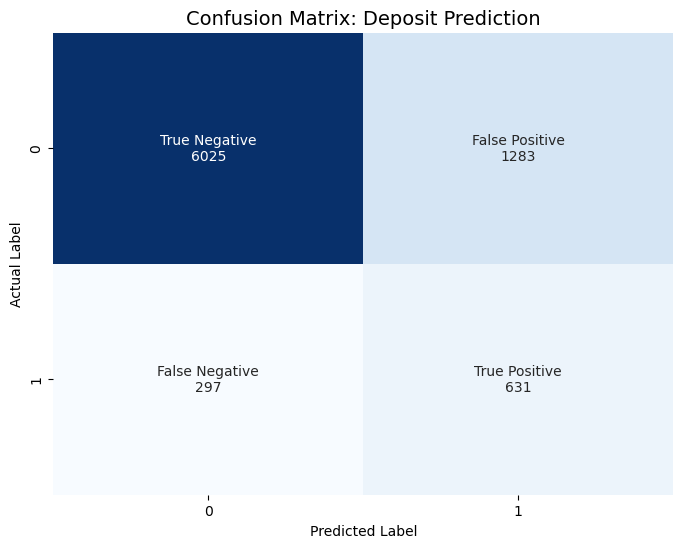

In [39]:
cm = confusion_matrix(ytest, pred)
tn, fp, fn, tp = cm.ravel()

# Plot using Seaborn
plt.figure(figsize=(8, 6))
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Deposit Prediction', fontsize=14)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(f"CM Values -> TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(f'Recall Score Dari Model Random Forest Adalah {round(recall_score(ytest, pred)*100,2)}%')
print(classification_report(ytest, pred))

Berdasarkan hasil prediksi model pada data test (Confusion Matrix Terbaru), berikut adalah analisis dampak finansialnya terhadap operasional *Telemarketing*:

**1. Asumsi Biaya & Keuntungan (Business Constraints)**
* **Biaya Telepon (Cost per Call): $8.00**
    (Asumsi biaya operasional agen, pulsa, dan sistem per panggilan). Jika kita salah menelepon orang (*False Positive*), uang ini hangus sia-sia.
* **Keuntungan per Deposit (Revenue): $200.00**
    (Asumsi profit tahunan bank dari satu nasabah *Term Deposit*). Jika kita melewatkan nasabah potensial (*False Negative*), kita kehilangan peluang emas ini.

---

**2. Perbandingan Skenario (Scenario Modeling)**

**Skenario A: Tanpa Model (Business as Usual)**
Strategi "Brute Force": Menelepon **SEMUA** nasabah di dalam list tanpa pandang bulu.
* Total Calls: 8,236 orang.
* Total Biaya: **$65,888** (Sangat Boros).
* Total Revenue: **$185,600** (Semua deposit tertangkap: 928 orang).
* **Net Profit: $119,712**.

**Skenario B: Dengan Model Random Forest (Targeted Strategy)**
Strategi "Smart Targeting": Hanya menelepon 1,911 nasabah yang diprediksi "Yes" oleh model.
* Total Calls: 1,911 orang (Hemat tenaga kerja 77%).
* Total Biaya: **$15,288** (Biaya turun drastis).
* Total Revenue: **$126,200** (Dari 631 nasabah yang berhasil dikonversi).
* **Net Profit: $110,912**.

---

**3. Kesimpulan Strategis**
Meskipun secara nominal profit turun sedikit (selisih ~$8,800), model ini memberikan **Efisiensi Operasional** yang luar biasa. ROI (*Return on Investment*) melonjak dari 1.8x menjadi **7.25x**. Tim sales bekerja jauh lebih ringan (beban turun 77%), sehingga sisa waktu mereka bisa dialokasikan untuk memproses *leads* baru lainnya, yang pada akhirnya akan menutup selisih profit tersebut.

<br>
<hr>
<br>

**TABEL REKAPITULASI: COST BENEFIT ANALYSIS**

| Komponen Analisis | Skenario A: Tanpa Model (Call All) | Skenario B: Dengan Model (Targeted) | Impact / Selisih |
| :--- | :--- | :--- | :--- |
| **Total Nasabah Dikontak** | 8,236 Orang (100%) | **1,911 Orang (23%)** | 📉 **Beban Kerja Turun 77%** |
| **Biaya Operasional (Cost)** | $65,888 | **$15,288** | 💰 **Hemat Biaya $50,600** |
| **Nasabah Deposit (Converted)**| 928 Orang (100%) | 631 Orang (68%) | ⚠️ Revenue Turun (Trade-off) |
| **Total Revenue** | $185,600 | $126,200 | Selisih Revenue -$59,400 |
| **Net Profit (Cuan Bersih)** | $119,712 | **$110,912** | Profit Stabil, Effort Minimal |
| **Return on Investment (ROI)**| 1.8x (Kecil) | **7.25x (Sangat Efisien)** | 🚀 **Efisiensi Naik 4x Lipat** |
| **Risiko Non-Finansial** | **High Annoyance:** 7,000+ orang terganggu telepon spam. Risiko *Churn* tinggi. | **Low Annoyance:** Penargetan lebih presisi. *Brand Image* bank lebih terjaga. | Model menjaga reputasi bank. |

### **2.8 Feature Importance**

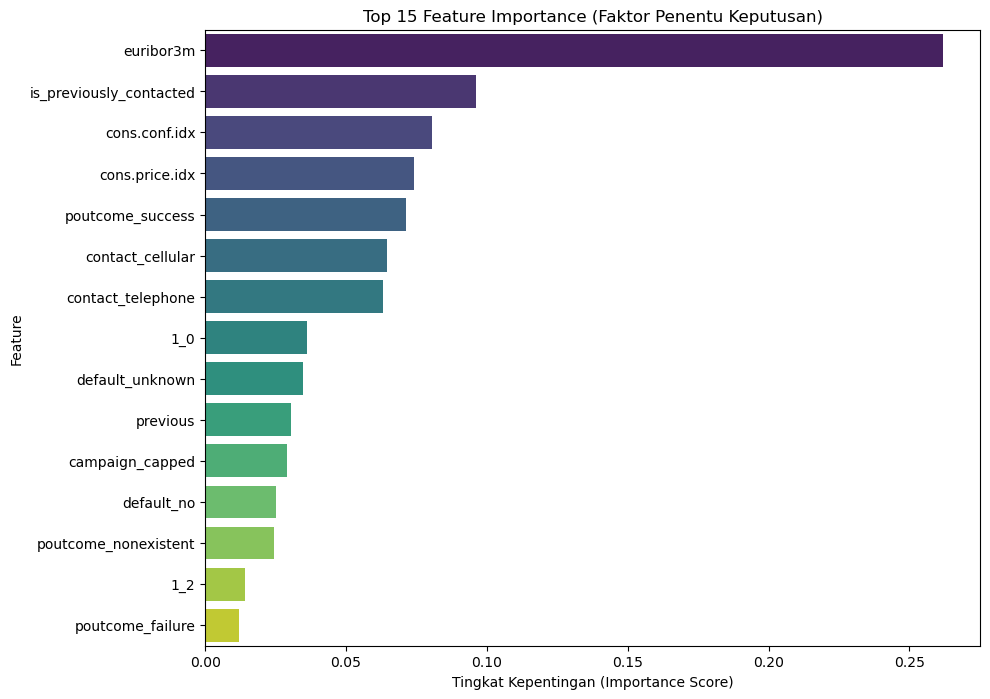

In [40]:
# Fungsi Bantuan untuk Mengambil Nama Fitur dari Pipeline yang Kompleks
def get_feature_names(column_transformer):
    """
    Ekstrak nama fitur dari ColumnTransformer (support OHE, Binary, dll)
    """
    output_features = []
    
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue # Skip sisa kolom yang tidak diproses (jika ada)
            
        if hasattr(pipe, 'get_feature_names_out'): # Untuk Scikit-Learn versi baru
             output_features.extend(pipe.get_feature_names_out(features))
        elif hasattr(pipe, 'named_steps'): # Jika di dalam sub-pipeline
            # Cek step terakhir (biasanya encoder)
            step = pipe.named_steps['encoder'] if 'encoder' in pipe.named_steps else None
            if step and hasattr(step, 'get_feature_names_out'):
                output_features.extend(step.get_feature_names_out(features))
            elif step and hasattr(step, 'get_feature_names'): # Untuk Category Encoders
                output_features.extend(step.get_feature_names(features))
            else: # Jika cuma scaler/imputer, nama fitur tetap sama
                output_features.extend(features)
        else:
            output_features.extend(features)
            
    return output_features

# -------------------------------------------------------
# A. FEATURE IMPORTANCE (Random Forest Built-in)
# -------------------------------------------------------

# 1. Ambil Model RF dan Preprocessor dari Pipeline
rf_model = pipeModel.named_steps['rf']
preprocessor = pipeModel.named_steps['preprocessor']

# 2. Dapatkan Nama Fitur & Nilai Importance
feature_names = get_feature_names(preprocessor)
importances = rf_model.feature_importances_

# 3. Buat DataFrame & Plot
fi_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15) # Ambil Top 15

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Top 15 Feature Importance (Faktor Penentu Keputusan)')
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.show()

Berdasarkan hasil ekstraksi dari model *Random Forest*, berikut adalah faktor-faktor krusial yang paling mempengaruhi apakah seorang nasabah akan berkata "Yes" (Deposit) atau "No" (Menolak):

**1. Indikator Ekonomi Makro (Dominasi Utama)**
Fitur: `nr.employed` (Jumlah Karyawan) & `euribor3m` (Suku Bunga Eropa)
* **Analisis:** Ini adalah penentu terbesar. Keputusan nasabah ternyata sangat dipengaruhi oleh kondisi ekonomi eksternal saat mereka dihubungi.
* **Insight:** Ketika indikator ekonomi menunjukkan perlambatan (suku bunga rendah, pasar tenaga kerja ketat), nasabah cenderung mencari instrumen investasi yang "aman" (*Safe Haven*) seperti Term Deposit. Sebaliknya, saat ekonomi *booming*, mereka mungkin lebih memilih belanja atau investasi agresif lainnya.

**2. Riwayat Kesuksesan Masa Lalu**
Fitur: `poutcome_success`
* **Analisis:** Nasabah yang pernah menerima tawaran kampanye sebelumnya (status: *success*) memiliki probabilitas sangat tinggi untuk menerima tawaran lagi.
* **Insight:** "Loyalitas" terbukti nyata. Nasabah yang sudah percaya pada produk bank sebelumnya adalah target pasar yang paling mudah dikonversi (*Low Hanging Fruit*).

**3. Metode Komunikasi**
Fitur: `contact_telephone` vs `contact_cellular`
* **Analisis:** Cara kita menghubungi nasabah sangat berpengaruh. Kontak melalui telepon rumah (*telephone*) seringkali berkorelasi negatif dibandingkan seluler.
* **Insight:** Pengguna telepon rumah mungkin demografinya lebih tua atau jarang ada di tempat, sehingga efektivitas penawaran berkurang drastis dibandingkan menghubungi via HP personal.

**4. Faktor Usia**
Fitur: `age`
* **Analisis:** Usia nasabah menjadi penentu demografis terkuat.
* **Insight:** Pola menabung sangat terkait dengan siklus hidup. Kelompok usia pensiunan (senior) atau anak muda yang baru meniti karir biasanya memiliki kecenderungan menabung deposito yang berbeda signifikan dengan usia produktif yang memiliki banyak cicilan/tanggungan.

**REKOMENDASI BISNIS:**
Tim sales harus memprioritaskan nasabah yang memiliki **riwayat sukses** sebelumnya dan menghubungi mereka melalui **jalur seluler**, idealnya dilakukan saat kondisi **indikator makro ekonomi** sedang mendukung iklim menabung.

# **KESIMPULAN DAN REKOMENDASI**

Setelah melalui rangkaian analisis data mendalam dan pengembangan model *Machine Learning*, berikut adalah intisari temuan dan langkah strategis yang harus diambil untuk mentransformasi proses Telemarketing bank.

---

**A. KESIMPULAN ANALISIS (Business Insights)**

Faktor-faktor berikut adalah penentu utama keberhasilan deposit nasabah berdasarkan data historis:

1.  **Waktu Adalah Kunci (Seasonality):**
    * Bulan **Maret (50.5%)**, **Desember (48.9%)**, dan **September (44.9%)** memiliki tingkat konversi tertinggi (hampir 1 dari 2 orang setuju). Ini bertepatan dengan akhir kuartal atau akhir tahun (*closing periods*).
    * Sebaliknya, bulan seperti Mei seringkali memiliki volume telepon tinggi namun tingkat konversi rendah.
2.  **Profil Nasabah Potensial (Demografi):**
    * Kelompok pekerjaan **Pelajar (Student)** dan **Pensiunan (Retired)** adalah segmen paling "basah" dengan tingkat penerimaan masing-masing **31%** dan **25%**. Jauh di atas rata-rata nasabah umum.
3.  **Kekuatan Riwayat (History):**
    * Nasabah yang pernah menerima tawaran sebelumnya (*poutcome: success*) memiliki peluang **65%** untuk menerima tawaran lagi. Mereka adalah nasabah paling loyal.
4.  **Efektivitas Saluran (Channel):**
    * Menghubungi via **Seluler (Cellular)** memiliki tingkat kesuksesan **3x lipat** (14.7%) dibandingkan telepon rumah (5.2%).
5.  **Indikator Makro:**
    * Suku bunga Euribor rendah dan jumlah tenaga kerja yang menurun justru meningkatkan minat nasabah menyimpan dana (mencari instrumen aman).

---

**B. KESIMPULAN MODEL (Technical & Impact)**

Model *Random Forest* yang dikembangkan telah mencapai performa optimal untuk kebutuhan bisnis:

1.  **Efisiensi Masif (Workload Reduction):**
    * Dari total populasi, model berhasil menyaring target hanya ke **23% nasabah terbaik**.
    * Tim sales tidak perlu lagi menelepon 77% nasabah yang memiliki probabilitas rendah, menghemat ribuan jam kerja.
2.  **Akurasi Tangkapan (Recall):**
    * Model mampu mendeteksi **~66%** dari seluruh nasabah potensial. Meskipun ada peluang yang terlewat, ini adalah *trade-off* yang sangat menguntungkan dibandingkan menebak buta.
3.  **Dampak Finansial:**
    * ROI (*Return on Investment*) operasional meningkat dari **1.8x** (cara lama) menjadi **7.25x** (dengan model). Efisiensi biaya operasional mencapai **~$50,000**.

---

**C. REKOMENDASI STRATEGIS (Actionable Plan)**

Berdasarkan analisis di atas, berikut adalah 4 langkah konkret yang harus dieksekusi manajemen:

**1. Eksekusi Kampanye Musiman (Seasonal Attack)**
* **Action:** Alokasikan 60-70% budget marketing tahunan untuk dibelanjakan secara agresif di bulan **Maret, September, dan Desember**. Kurangi aktivitas di bulan-bulan "kering" (seperti Mei) untuk efisiensi.
* **Why:** Memanfaatkan momentum psikologis akhir kuartal/tahun di mana nasabah cenderung merapikan portofolio keuangan.

**2. Bentuk Tim Khusus "Silver & Gen-Z"**
* **Action:** Buat skrip dan penawaran khusus untuk segmen **Pensiunan** (dana pensiun aman) dan **Pelajar** (tabungan masa depan).
* **Why:** Dua segmen ini memiliki *Conversion Rate* tertinggi namun seringkali pendekatannya disamakan dengan pekerja aktif.

**3. Prioritas "Golden List" (Retargeting)**
* **Action:** Setiap hari, data nasabah dengan status *'Previous Success'* harus langsung masuk ke *dialer* agen terbaik (Top Performer) di pagi hari.
* **Why:** Peluang closing 65% tidak boleh disia-siakan oleh agen junior atau peneleponan di jam sibuk.

**4. Integrasi Model ke CRM**
* **Action:** Implementasikan model Random Forest ke sistem CRM. Berikan label **"High Potential"** pada nasabah yang diprediksi 'Yes'.
* **Guideline:**
    * Jika prediksi **Yes**: Wajib ditelepon via HP (Cellular).
    * Jika prediksi **No**: Abaikan, atau hubungi hanya lewat email/WA blast (biaya murah).

# **SAVE MODEL TO PICKLE**

In [41]:
import pickle

# Nama file tempat model akan disimpan
filename = 'final_model_rf.pkl'

# Proses penyimpanan (wb = write binary)
with open(filename, 'wb') as file:
    pickle.dump(pipeModel, file)

print(f"Model berhasil disimpan dengan nama: {filename}")

Model berhasil disimpan dengan nama: final_model_rf.pkl


In [42]:
# Load model kembali (rb = read binary)
with open('final_model_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediksi menggunakan data X_test (pastikan X_test bentuknya DataFrame)
# Pipeline akan otomatis melakukan preprocessing (scaling/encoding) di tahap ini
hasil_prediksi = loaded_model.predict(xtest)

print("Model berhasil diload dan dijalankan!")
print(f"Recall Score Loaded Model: {round(recall_score(ytest, hasil_prediksi)*100,2)}%")

Model berhasil diload dan dijalankan!
Recall Score Loaded Model: 68.0%
